# Chapter 5: Probability Distributions

__Probability__ takes on a value from 0 to 1, with a probability $P(X) = 0$ for an event meaning that the stated condition - e.g., a standard 6 sided die will yield a 7 when rolled -  would never occur in an infinite number of flips. A probability of 0.5 means that in a sufficiently large number of trials, approximately half of the trials would result in the stated condition. A probability of 1 means all trials would result in the stated condition so that the number of successes in a trial would be equal to the number of attempts. 

__Probability Distributions__ display all of the possible values that a _random variable_ $X$ could take on on the x-axis, and the corresponding probability of that value on the y-axis. Hence, the area under the probability distribution will always be equal to one. 
   - The random variable $\bar{X}$, which represents the the mean of a sample drawn from a larger population, defines a _**sampling distribution**_, which gives all values possible for $\bar{X}$, $\bar{X_i}$, and the probability of that value occuring. $\bar{X}$ can take on values falling on its sampling distribution, which describe the likelihood of getting a given mean for a given sample size.  This sampling distribution takes on a standard deviation of $\frac{S}{\sqrt(n)}$, otherwise known as the **standard error.** 

Distributions can be described by: 
- Their mean, $\mu$(or $\bar{X}$ for sampling distributions), which is the average value of the dataset.  
- Their standard deviation, $\sigma$, which determines how flat the curve is, and how densely the data clusters around the mean(SE for sampling distributions).
- Skewness, $S_{KP}$, which refers to a distortion or asymmetry of a distribution. 
- Kurtosis, $k$, which describes how much of the distribution lays in its tails. 

### Types of Probability Distributions
#### Normal Distributions
Normal Distribution, also known as Gaussian distribution, is ubiquitous in Data Science and often used when modeling economic phenomena. You will encounter it in predictive models you create. It is one of the assumptions of many statistical techniques.

A normal distribution has a bell-shaped density curve described by its mean $\mu$ and standard deviation $\sigma$. The density curve is symmetrical(skewness of 0), centered about its mean, with its spread determined by its standard deviation. Data near the mean - e.g., $\sigma < 1$ - are more frequent in occurrence than data far from the mean - e.g., $\sigma > 2$. 


A random variable $X$ which follows a normal distribution with mean $\mu$ and standard deviation $\sigma$ and has this density function: 
<h3 align="center">
    <font size="4">
        $ X = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2}(\frac{x-\mu}{\sigma})^2} $
    </font>
    </h3> 
    
If one knew the mean and standard deviation of a particular distribution, it would be possible to estimate the probability of drawing a value from a particular range - e.g., $a \leq X \leq b$ - by taking the definite integral of this function: 
<h3 align="center">
    <font size="4">
        $\int_{a}^{b}\frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2}(\frac{x-\mu}{\sigma})^2}dx$.
    </font>
</h3>

#### Standard Normal Distribution

The standardized normal distribution is the most important member of the family of normal probability distributions—the one with $\mu = 0$  and $\sigma = 1$. The normal random variable distributed according to the standard normal distribution is called the standard normal variable and is denoted by $Z$. It represents the number of standard deviations a given point X lies from the mean of the standard normal distribution.  It is expressed as
<h3 align="center">
    <font size="4">
        $ Z =  \frac{X-\mu}{\sigma}$
    </h3> 

A key feature of all normal distributions is that, using the equation above, they can be transformed to be analyzed using the standard normal distribution.
    
_If you divide any normal distribution by its standard deviation(normalizing the SD to be 1), that normal distribution becomes the standard normal distribution._

In [1]:
import pandas as pd

def total(lst):
    total_ = 0
    n = len(lst)
    for i in range(n):
        total_ += lst[i]
    return total_

def mean(lst):
    n = len(lst)
    mean_ = total(lst) / n
    
    return mean_

def median(lst):
    n = len(lst)
    lst = sorted(lst)
    #lists of even length divided by 2 have reminder 0
    if n % 2 != 0:
        #list length is odd
        middle_index = int((n - 1) / 2)
        median_ = lst[middle_index]
    else:
        upper_middle_index = int(n / 2)
        lower_middle_index = upper_middle_index - 1
        # pass slice with two middle values to mean()
        median_ = mean(lst[lower_middle_index : upper_middle_index + 1])
        
    return median_

def mode(lst):
    # use to record value(s) that appear most times
    max_count = 0
    # use to count occurrences of each value in list
    counter_dict = {}
    for value in lst:
        # count for each value should start at 0
        counter_dict[value] = 0
    for value in lst:
        # add on to the count of the value for each occurrence in lst
        counter_dict[value] += 1
    # make a list of the value (not keys) from the dictionary
    count_list = list(counter_dict.values())
    # and find the max value
    max_count = max(count_list)
    # use a generator to make a list of the values (keys) whose number of 
    # occurences in the list match max_count
    mode_ = [key for key in counter_dict if counter_dict[key] == max_count]
    
    return mode_

def variance(lst, sample = True):
    # popvar(list) = sum((xi - list_mean)**2) / n for all xi in list
    # save mean value of list
    list_mean = mean(lst)
    # use n to calculate average of sum squared diffs
    n = len(lst)
    DoF = n - 1
    # create value we can add squared diffs to
    sum_sq_diff = 0
    for val in lst:
        # adds each squared diff to sum_sq_diff
        sum_sq_diff += (val - list_mean) ** 2
    if sample == False:
        # normalize result by dividing by n
        variance_ = sum_sq_diff / n
    else:
        # for samples, normalize by dividing by (n-1)
        variance_ = sum_sq_diff / DoF
    
    return variance_

def SD(lst, sample = True):
    # Standard deviation is the square root of variance
    SD_ = variance(lst, sample) ** (1/2)
    
    return SD_

def STE(lst, sample = True):
    n = len(lst)
    se = SD(lst, sample) / n ** (1/2)
    
    return se

def covariance(lst1, lst2, sample = False):
    # determine the mean of each list
    mean1 = mean(lst1)
    mean2 = mean(lst2)
    # instantiate a variable holding the value of 0; this will be used to 
    # sum the values generated in the for loop below
    cov = 0
    n1 = len(lst1)
    n2 = len(lst2)
    # check list lengths are equal
    if n1 == n2:
        n = n1
        # sum the product of the differences
        for i in range(n):
            cov += (lst1[i] - mean1) * (lst2[i] - mean2)
        if sample == False:
            cov = cov / n
        # account for sample by dividing by one less than number of elements in list
        else:
            cov = cov / (n - 1)
        # return covariance
        return cov
    else:
        print("List lengths are not equal")
        print("List1:", n1)
        print("List2:", n2)

def correlation(lst1, lst2):
    # corr(x,y) = cov(x, y) / (SD(x) * SD(y))
    cov = covariance(lst1, lst2)
    SD1 = SD(lst1)
    SD2 = SD(lst2)
    corr = cov / (SD1 * SD2)
    return corr

def skewness(lst, sample = False):
    mean_ = mean(lst)
    SD_ = SD(lst, sample)
    skew = 0
    n = len(lst)
    for val in lst:
        skew += (val - mean_) ** 3
    skew = skew / (n * SD_ ** 3) if not sample else n * skew / ((n - 1)*(n - 1) * SD_ ** 3)
        
    return skew

def kurtosis(lst, sample = False):
    mean_ = mean(lst)
    kurt = 0
    SD_ = SD(lst, sample)
    n = len(lst)
    for x in lst:
        kurt += (x - mean_) ** 4
    kurt = kurt / (n * SD_ ** 4) if  sample == False else  n * (n + 1) * kurt / \
    ((n - 1) * (n - 2) * (n - 3) * (SD_ ** 4)) - (3 *(n - 1) ** 2) / ((n - 2) * (n - 3))
    
    return kurt

def gather_statistics(df, sample = False):
    dct = {key:{} for key in df}
    for key, val in df.items():
        # drop any missing observations from dataframe
        val = val.dropna(axis=0)
        dct[key]["mean"] = round(mean(val),3)
        dct[key]["median"] = round(median(val),3)
        # skip mode. . .         dct[key]["mode"] = mode(val)
        dct[key]["variance"] = round(variance(val, sample),3)
        dct[key]["S.D."] = round(SD(val, sample) ,3)
        dct[key]["skewness"] = round(skewness(val, sample),3)
        dct[key]["kurtosis"] = round(kurtosis(val, sample),3)
    stats_df = pd.DataFrame(dct)
    return stats_df

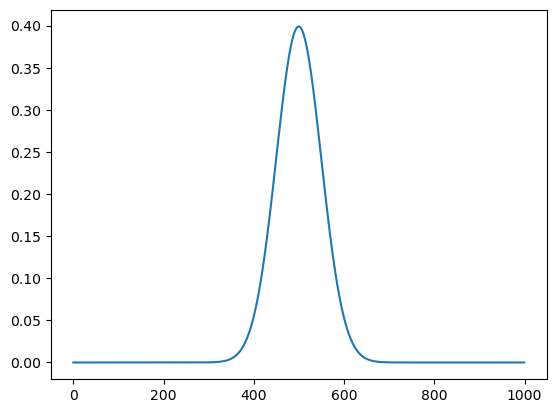

In [2]:
import math
import matplotlib.pyplot as plt
import numpy as np

def mean(list_obj):
    n = len(list_obj)
    mean_ = total(list_obj) / n
    return mean_

# takes a list of x values in a given range with some number of finite 
# divisions, will create a y value that correlates with each x value 
# that was passed
# the list space from -10 to 10 has 1000 divisions
def normal_dist(mean, sd, x = np.linspace(-10,10,1000)):
    prob_density = 1 / (sd * (2 * np.pi) ** .5) * np.exp(
        -0.5 * ((x - mean) / sd) **2)
    return prob_density

normal_dist_list = normal_dist(mean = 0, sd = 1)
# plot normal distribution
plt.plot(normal_dist_list)
# it is very important to find the normal distribution of the data

Text(0.5, 1.0, '$\\mu$ = 0\t$\\sigma_0$ = 1\t$\\sigma_1$ = 2\t$\\sigma_2$ = 3\t')

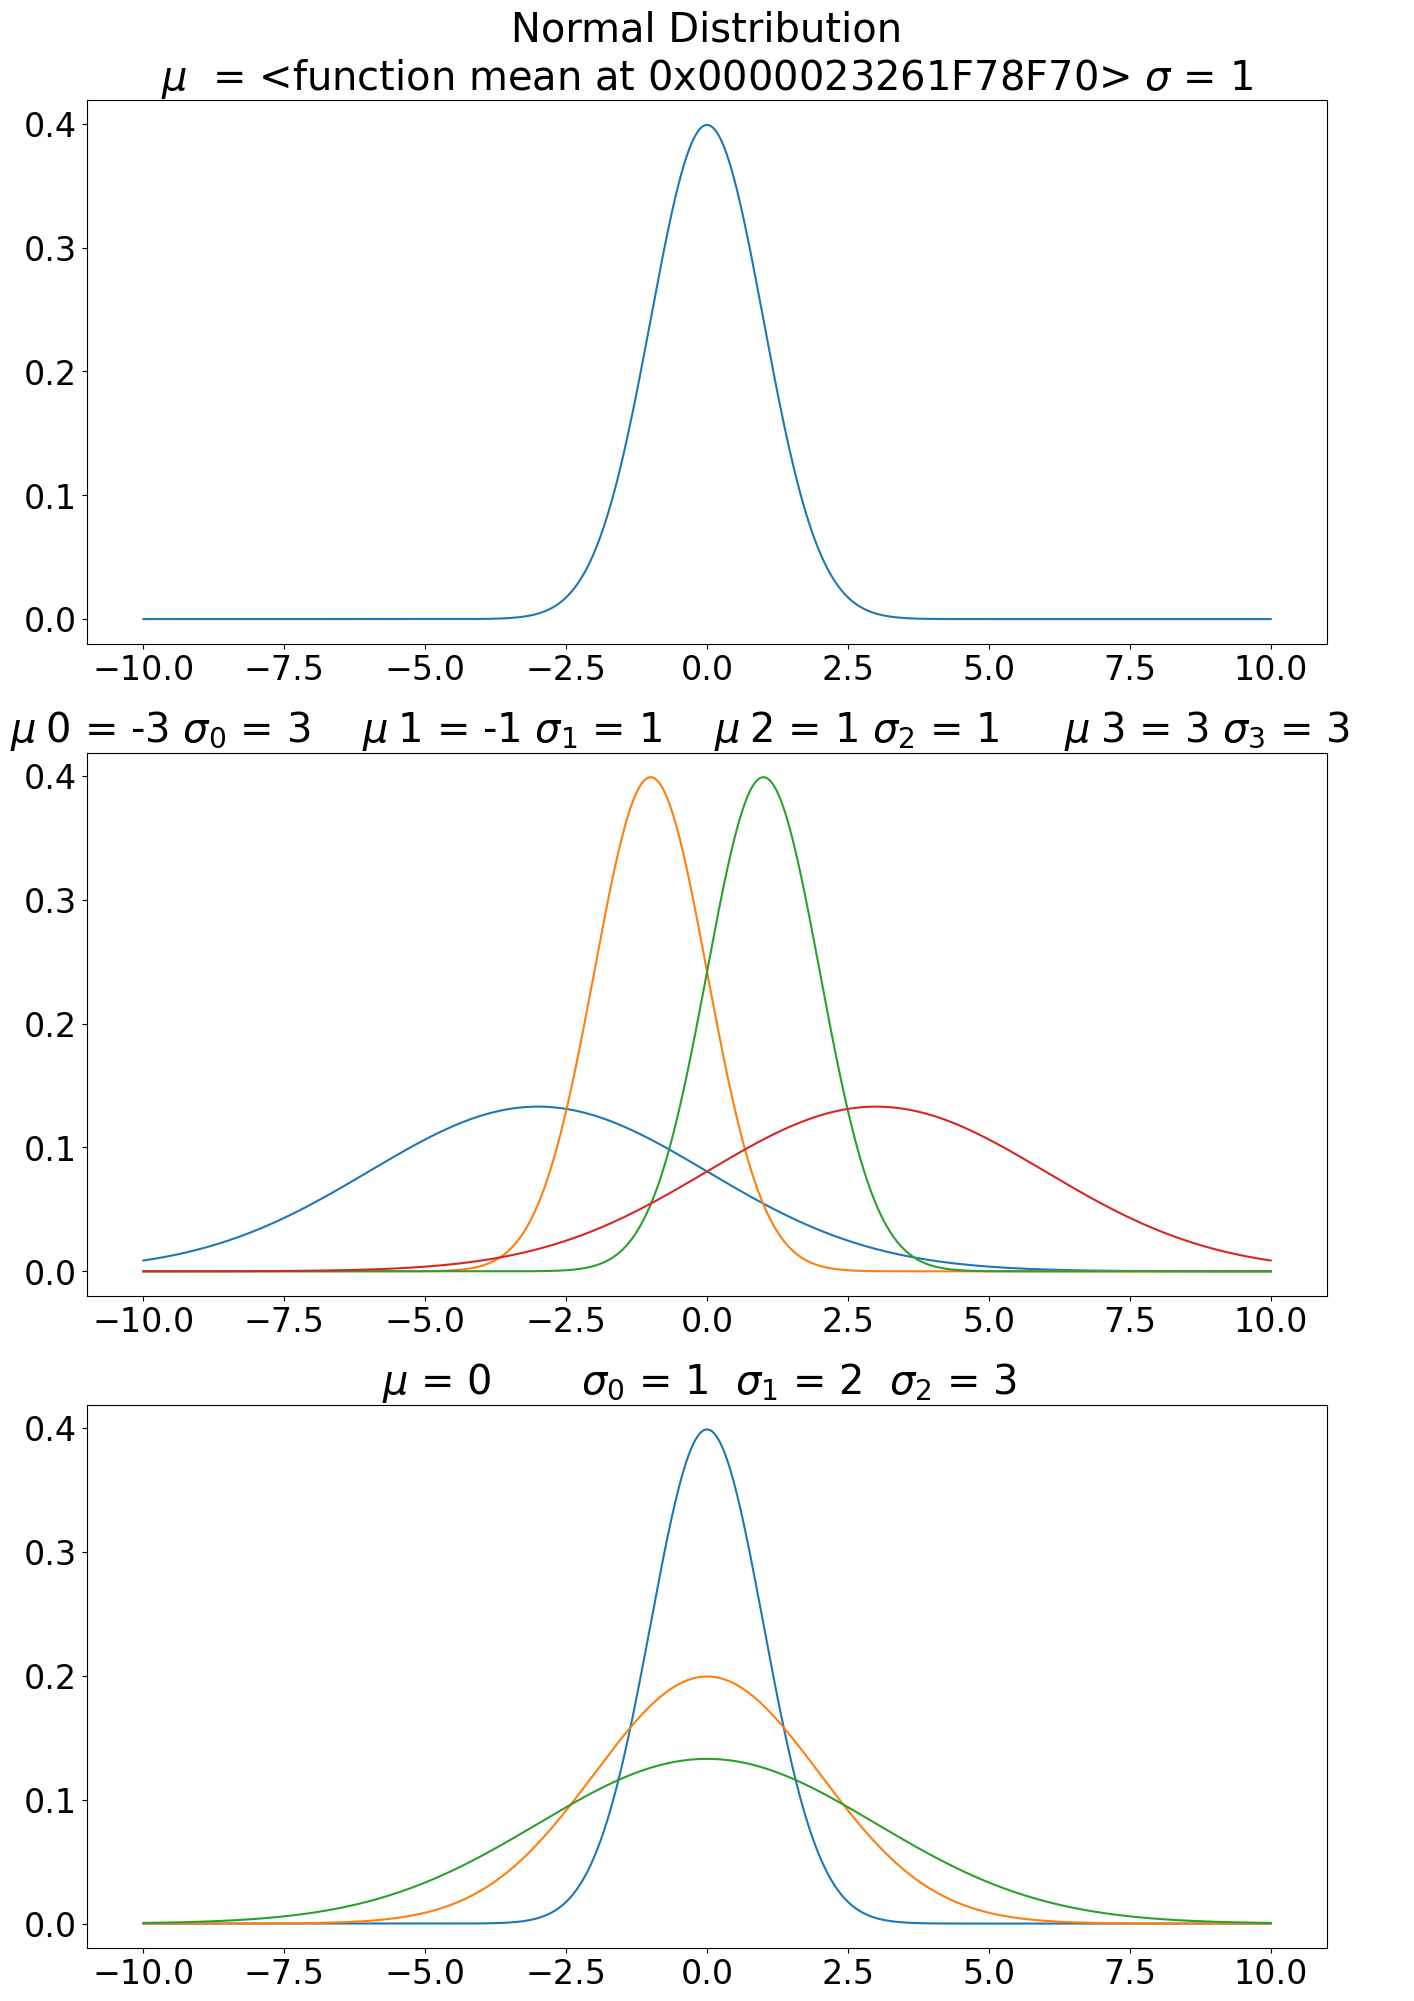

In [3]:
plt.rcParams.update({"font.size":24})
fig, axs = plt.subplots(3, 1, figsize = (16, 24))
x = np.linspace(-10, 10, 1000)

# perform transformation
mean_, sd = 0, 1
normal_dist_list = normal_dist(mean = mean_, sd = sd)
axs[0].plot(x, normal_dist_list)
axs[0].set_title("Normal Distribution\n$\mu$  = " + \
         str(mean) + " $\sigma$ = " + str(sd))

ax1_title = ""
ax1_sub = 0
for mean_ in range(-3,4, 2):
    sd = abs(mean_)
    normal_dist_list = normal_dist(mean = mean_, sd = sd)
    axs[1].plot(x, normal_dist_list)
    ax1_title = ax1_title + "$\mu_ " + str(ax1_sub) + "$ = " + str(mean_) + " "
    ax1_title = ax1_title + "$\sigma_" + str(ax1_sub) + "$ = " + str(sd) + "\t"
    ax1_sub += 1
axs[1].set_title(ax1_title)

ax2_title = "$\mu$ = 0\t"
ax2_sub = 0
for sd in range(1,4):
    mean_ = 0 
    normal_dist_list = normal_dist(mean = mean_, sd = sd)
    axs[2].plot(x, normal_dist_list)
    ax2_title = ax2_title + "$\sigma_" + str(ax2_sub) + "$ = " + str(sd) + "\t"
    ax2_sub += 1
axs[2].set_title(ax2_title)


## Lognormal Distribution

A random variable $X$ is said to have a lognormal distribution if $Y = ln(X)$ is normally distributed, where $ln$ denotes the natural logarithm.

In other words, $X$ is log-normally distributed if the natural logarithm of $X$ is normally distributed with mean $\mu$  and variance $\sigma ^2$:

$ln(X) = N(\mu, \sigma^2)$

The lognormal distribution is positively skewed with many small values and just a few large values. Consequently, the mean is greater than the mode in most cases.
Since the lognormal distribution is bound by zero on the lower side, it is perfect for modeling asset prices that cannot take negative values. On the other hand, the normal distribution cannot be used for the same purpose because it has a negative side.

When the returns on a stock (continuously compounded) follow a normal distribution(as shown above), the stock prices follow a lognormal distribution. Note that even if returns do not follow a normal distribution, the lognormal distribution is still the most appropriate model for stock prices.

The probability density function of the distribution is:
<h3 align="center">
    <font size="4">
        $f(x) = \frac{1}{x\sigma\sqrt{2\pi}}e^{\frac{- (lnx-\mu)^2}{2\sigma^2}}$
    </font>
    </h3> 

In [4]:
# ignore the warnings becuase the warnings are misguided, know this before hand
import warnings
warnings.filterwarnings("ignore")

def create_lognormal(mean, sd, x = np.linspace(0,10,1000)):
    density_points = (1 / x * sd * np.sqrt(2* np.pi)) * np.e ** (
        -(np.log(x) - mean) ** 2 / (2 * sd ** 2))
    return density_points

x = np.linspace(0, 10, 10000)
log_norm = create_lognormal(0, 1, x)

Text(0.5, 1.0, 'Lognormal Distribution with μ = <function mean at 0x0000023261F78F70> and σ = 3')

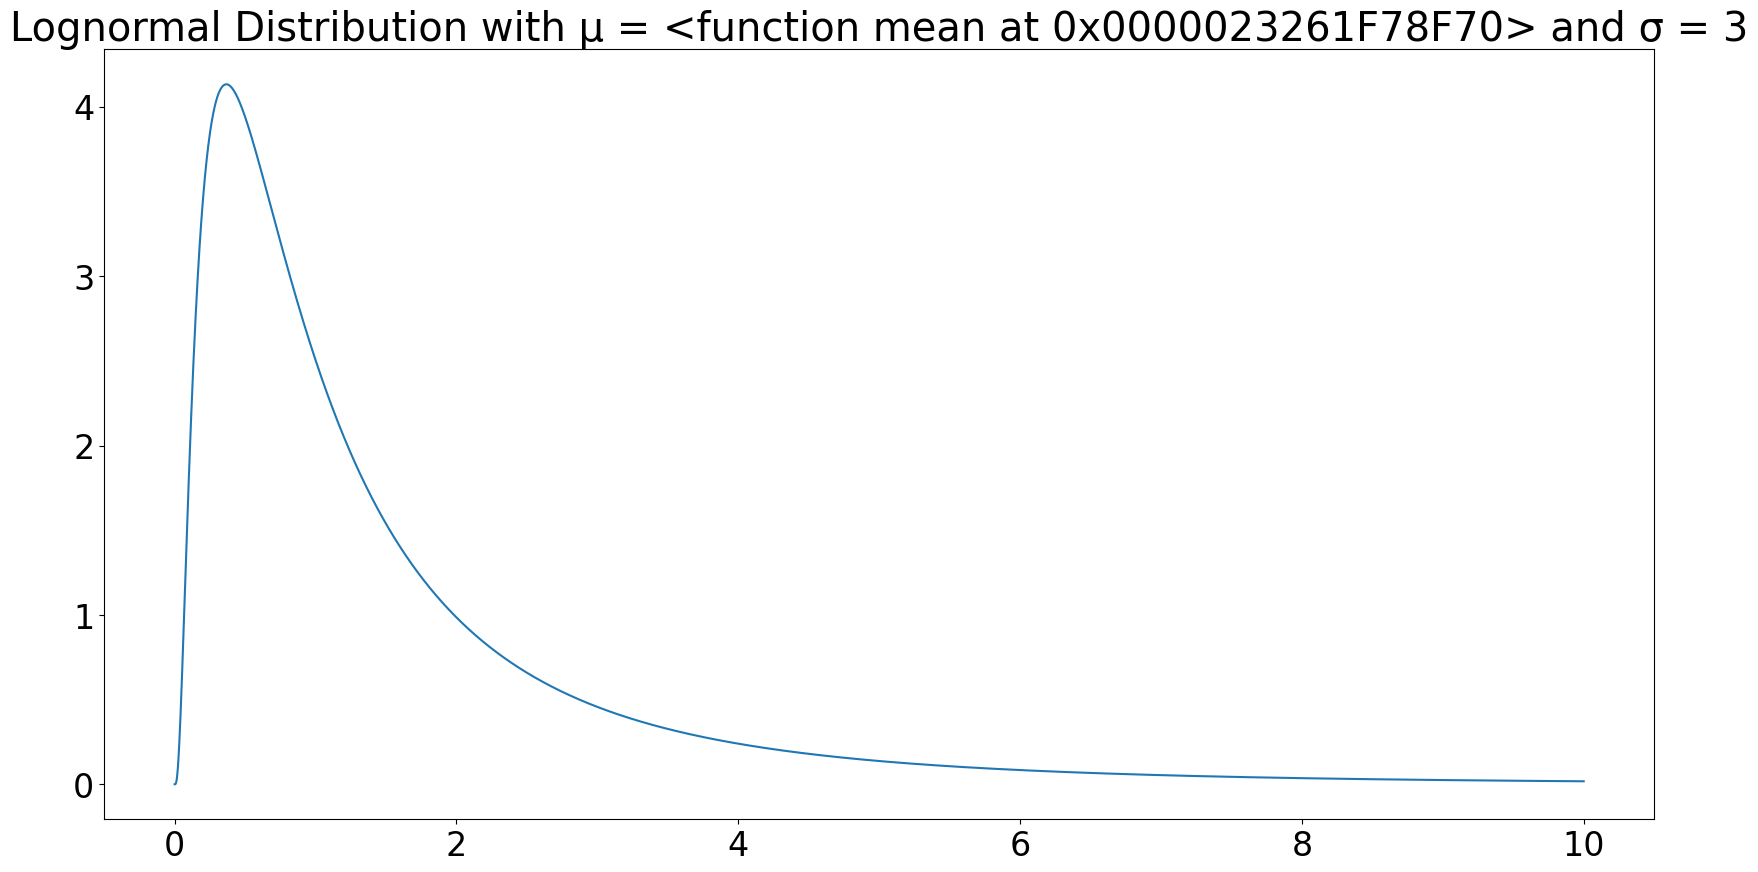

In [5]:
fig, ax = plt.subplots(figsize = (20, 10))
ax.plot(x, log_norm)
ax.set_title(
    "Lognormal Distribution with μ = " + str(mean) +" and σ = " + str(sd))

Text(0.5, 1.0, 'Lognormal Distribution with μ = 0 and σ = 1')

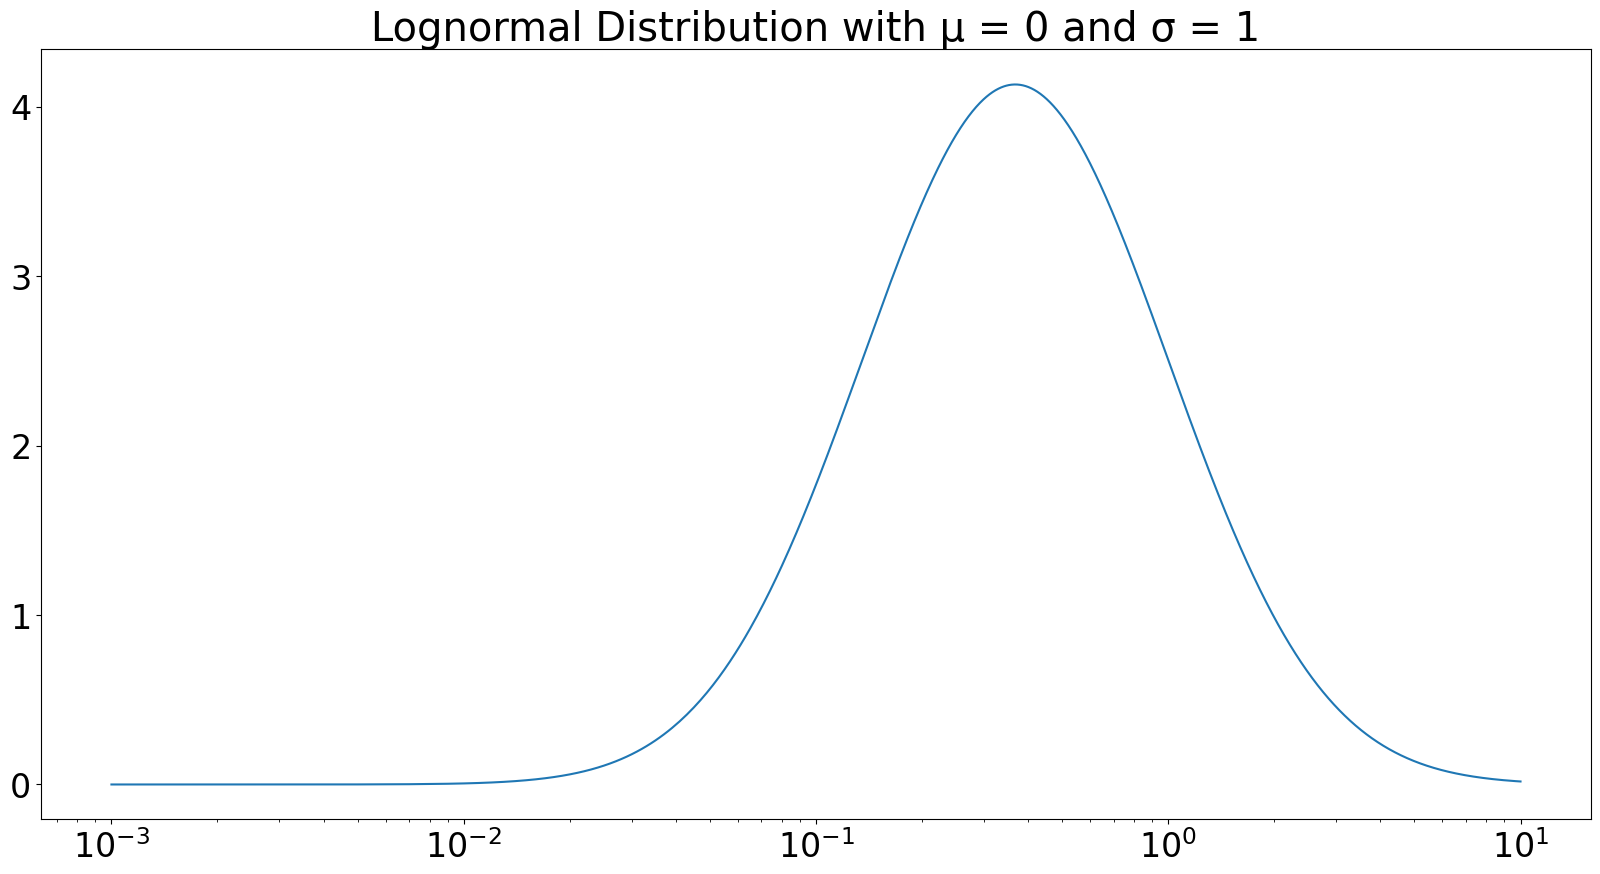

In [6]:
fig, ax = plt.subplots(figsize = (20, 10))
ax.plot(x, log_norm)
plt.xscale("log")
ax.set_title("Lognormal Distribution with μ = 0 and σ = 1")

### Binomial Distribution
If $X$ is a random variable that yields the number of successess seen in the trials of a binomial(yes or no) experiment, then we say that $X$ follows a binomial distribution.

We are interested in finding the probability that some particular number of successes is seen in the course of that binomial experiment.

- $n$ = the number of trials
- $x$ = some number of successes, with $0≤x≤n$
- $p$ = the probability of success on any one trial
- $q$ = $1−p$ = the probability of failure on any one trial

A binomial trial can result in a success with probability $p$ and a failure with probability $q = 1−p$. Then the probability distribution of the binomial random variable $X$, the number of successes in $n$ independent trials, is
<h3 align="center">
    <font size="4">
        $b(x; n, p) = {n \choose x}p^xq^{n-x}$
    </font>
    </h3> 

Where  $x = 0, 1, 2,..., n$ and ${n \choose x}=\frac{n!}{x!(n-x)!}$

The most common example is flipping a coin, which can be modeled as $x=$ the number of "heads" or "tails" in $n$ trials. The probability of success and failure is 0.5. 

The mean $\mu$ and standard deviation $\sigma$ for a binomial distribution $b(x; n, p)$ are
- $\mu = np$
- $\sigma = \sqrt{np(1-p)}$

We define and graph the binomial distribution for various x, p, and n values. 

As an example of the binomial distribution, we can think of the top hedge funds in the stock market. If we assume that the markets are efficient and any given mutual fund only has a 50% probability of beating the market in every year, if there is a large $n$, or a large number of firms, many of them will survive for many years, just by chance. This example is demonstrated wonderfully in Burton Malkiel's *A Random Walk Down Wallstreet* in which he describes a coin flipping contest of 1000 people, which guarantees that multiple people will win more than 10 rounds simply by chance, and then become world-renouned as amazing coin-flippers. 

- How many funds will 'beat' an efficient market for more than 10 years if there are 1000 funds to start? We will find the probability of a single fund beating the market for that long and then multiply that by 1000 funds. 

- $ = P(1) = {10 \choose 1}0.5^{1}0.5^{10-1} = 0.0097$, so there is a 0.97% chance of a single fund beating an efficient market for 10 years, and we can reasonably expect that 97 funds will beat the market for 10 years if 100 start, just by chance. 


In [7]:
def binomial(x, n, p):
    q = 1 - p
    return float(math.factorial(n)) / (
        math.factorial(x) * math.factorial(n-x)) * p ** x * q ** (n - x) 
binomial(x = 40,n = 100, p = 0.5)

0.010843866711637989

In [8]:
# probability of generating a total between X0 and X1 for a given p, n
def probability_of_outcome(X0, X1, p, n):
    P = 0
    
    # taking a descrete integral
    # the area beneath the range given
    for x in range(X0, X1 +1):
        P += binomial(x = x, n = 100, p = .5)
    return P
p, n = .5, 100
X0 = 40
X1 = 60

probability_of_outcome(X0, X1, p, n)

0.9647997997822952

In [9]:
from matplotlib import cm
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import Normalize

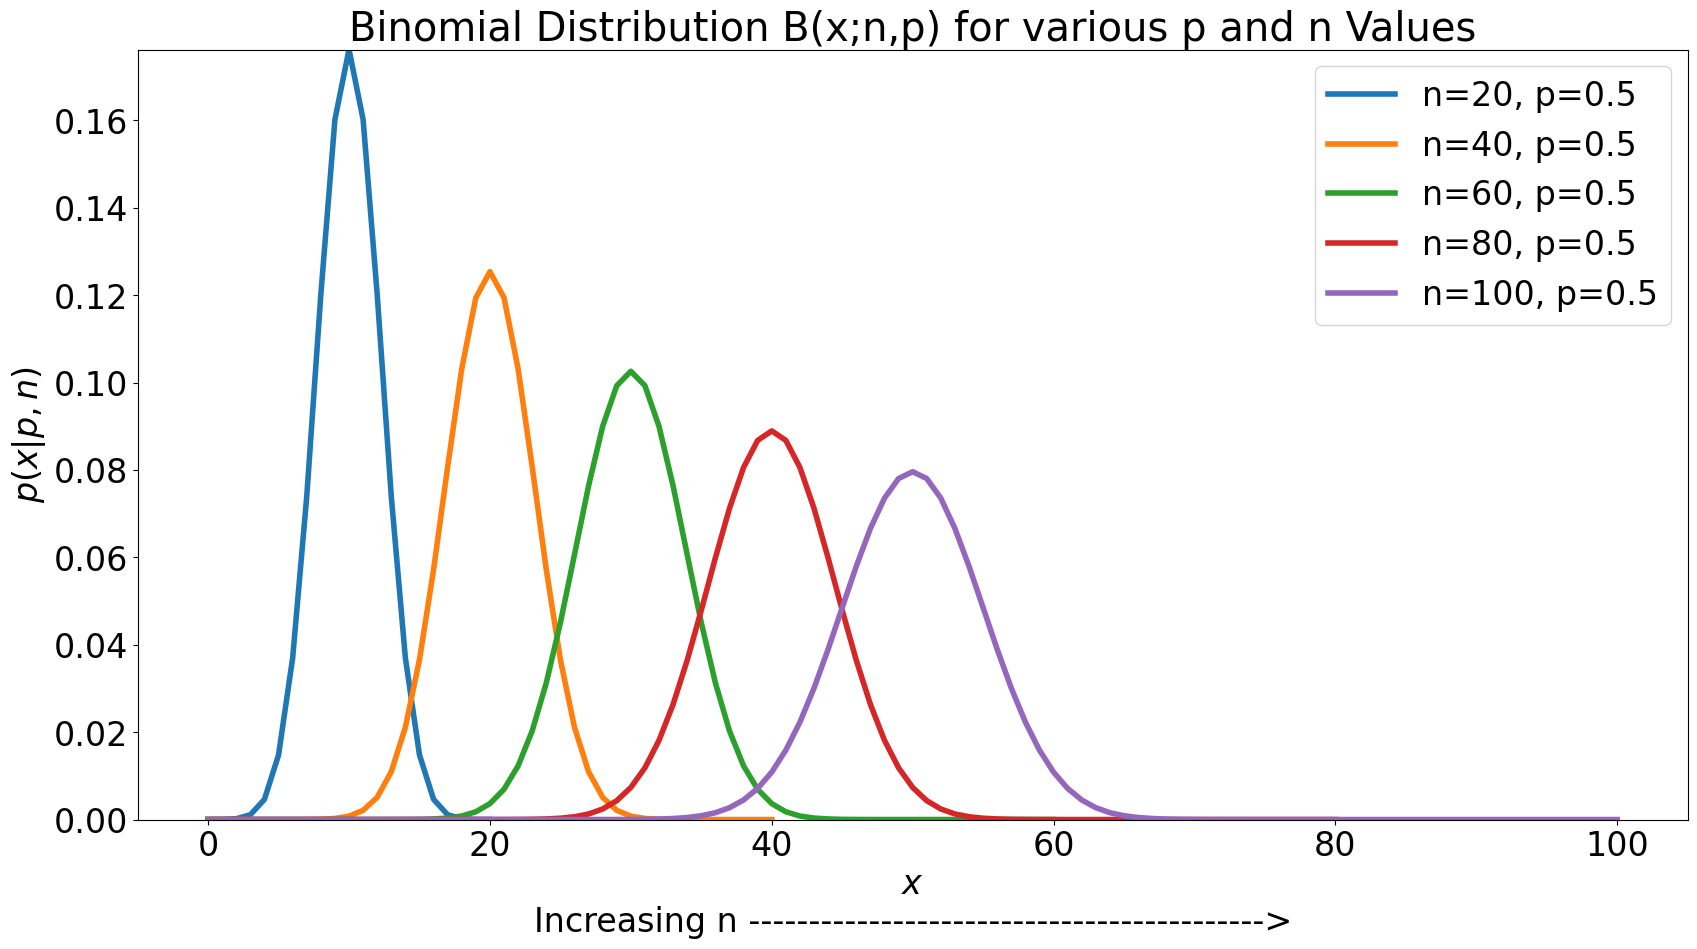

In [10]:
fig, ax = plt.subplots(figsize = (20,10))
cmap = cm.get_cmap("Blues")
ymax = binomial(20 * p, 20, p)

for n in range(20, 101, 20):
  #  x = int(n * p)
    # make a list of probability of every possible outcome
    # from 0 to n
    # create the whole distribution from 0 to n
    binom_vars = [binomial(x, n, p) for x in range(n + 1)]
    # plot_line that is composed of all probabilities
    plt.plot(binom_vars,
            linewidth = 4,
            label=f"n={n}, p={p}")
# change max y axis value from 1 to something closer to the maximum 
# probability across all ranges from 0 to n for which we constructed
# distributions
ax.set_ylim(ymin = 0, ymax = ymax)

plt.xlabel("$x$\nIncreasing n ------------------------------------------->",
           fontsize=24)
plt.ylabel("$p(x | p, n)$", fontsize=24)
plt.title("Binomial Distribution B(x;n,p) for various p and n Values")
plt.legend()
    
    

In [11]:
!pip install pandas-datareader
!pip install yfinance
import pandas_datareader.data as web
import yfinance as yf
import datetime

In [12]:
yf.pdr_override()
start = datetime.datetime(2012, 1, 1)
end = datetime.datetime.today()

data_dict = {}
stocks = [ "MSFT", "AAPL", "PG", "TSLA"]
for stock in stocks:
    data_dict[stock] = web.get_data_yahoo(stock, start, end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [13]:
data_dict["MSFT"]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,26.549999,26.959999,26.389999,26.770000,21.413067,64731500
2012-01-04,26.820000,27.469999,26.780001,27.400000,21.916996,80516100
2012-01-05,27.379999,27.730000,27.290001,27.680000,22.140966,56081400
2012-01-06,27.530001,28.190001,27.530001,28.110001,22.484919,99455500
2012-01-09,28.049999,28.100000,27.719999,27.740000,22.188963,59706800
...,...,...,...,...,...,...
2023-03-21,274.880005,275.000000,269.519989,273.779999,273.779999,34558700
2023-03-22,273.399994,281.040009,272.179993,272.290009,272.290009,34873300
2023-03-23,277.940002,281.059998,275.200012,277.660004,277.660004,36610900


## Create a dataframe for the close data of all four stocks


In [14]:
# list of all the close data for each stock
[df["Close"] for df in data_dict.values()]
# data_dict.keys()

[Date
 2012-01-03     26.770000
 2012-01-04     27.400000
 2012-01-05     27.680000
 2012-01-06     28.110001
 2012-01-09     27.740000
                  ...    
 2023-03-21    273.779999
 2023-03-22    272.290009
 2023-03-23    277.660004
 2023-03-24    280.570007
 2023-03-27    276.380005
 Name: Close, Length: 2826, dtype: float64,
 Date
 2012-01-03     14.686786
 2012-01-04     14.765714
 2012-01-05     14.929643
 2012-01-06     15.085714
 2012-01-09     15.061786
                  ...    
 2023-03-21    159.279999
 2023-03-22    157.830002
 2023-03-23    158.929993
 2023-03-24    160.250000
 2023-03-27    158.279999
 Name: Close, Length: 2826, dtype: float64,
 Date
 2012-01-03     66.830002
 2012-01-04     66.800003
 2012-01-05     66.519997
 2012-01-06     66.360001
 2012-01-09     66.639999
                  ...    
 2023-03-21    144.080002
 2023-03-22    143.990005
 2023-03-23    143.789993
 2023-03-24    146.720001
 2023-03-27    145.949997
 Name: Close, Length: 2826, dtype: f

In [15]:
import pandas as pd

# creating a single dataframe with each of the different stocks
close_data = pd.concat([df["Close"] for df in data_dict.values()],
                       keys = data_dict.keys(),
                       axis = 1)
close_data

,MSFT,AAPL,PG,TSLA
Date,,,,
2012-01-03,26.770000,14.686786,66.830002,1.872000
2012-01-04,27.400000,14.765714,66.800003,1.847333
2012-01-05,27.680000,14.929643,66.519997,1.808000
2012-01-06,28.110001,15.085714,66.360001,1.794000
2012-01-09,27.740000,15.061786,66.639999,1.816667
...,...,...,...,...
2023-03-21,273.779999,159.279999,144.080002,197.580002
2023-03-22,272.290009,157.830002,143.990005,191.149994
2023-03-23,277.660004,158.929993,143.789993,192.220001


Text(0.5, 1.0, 'Daily Stock Prices')

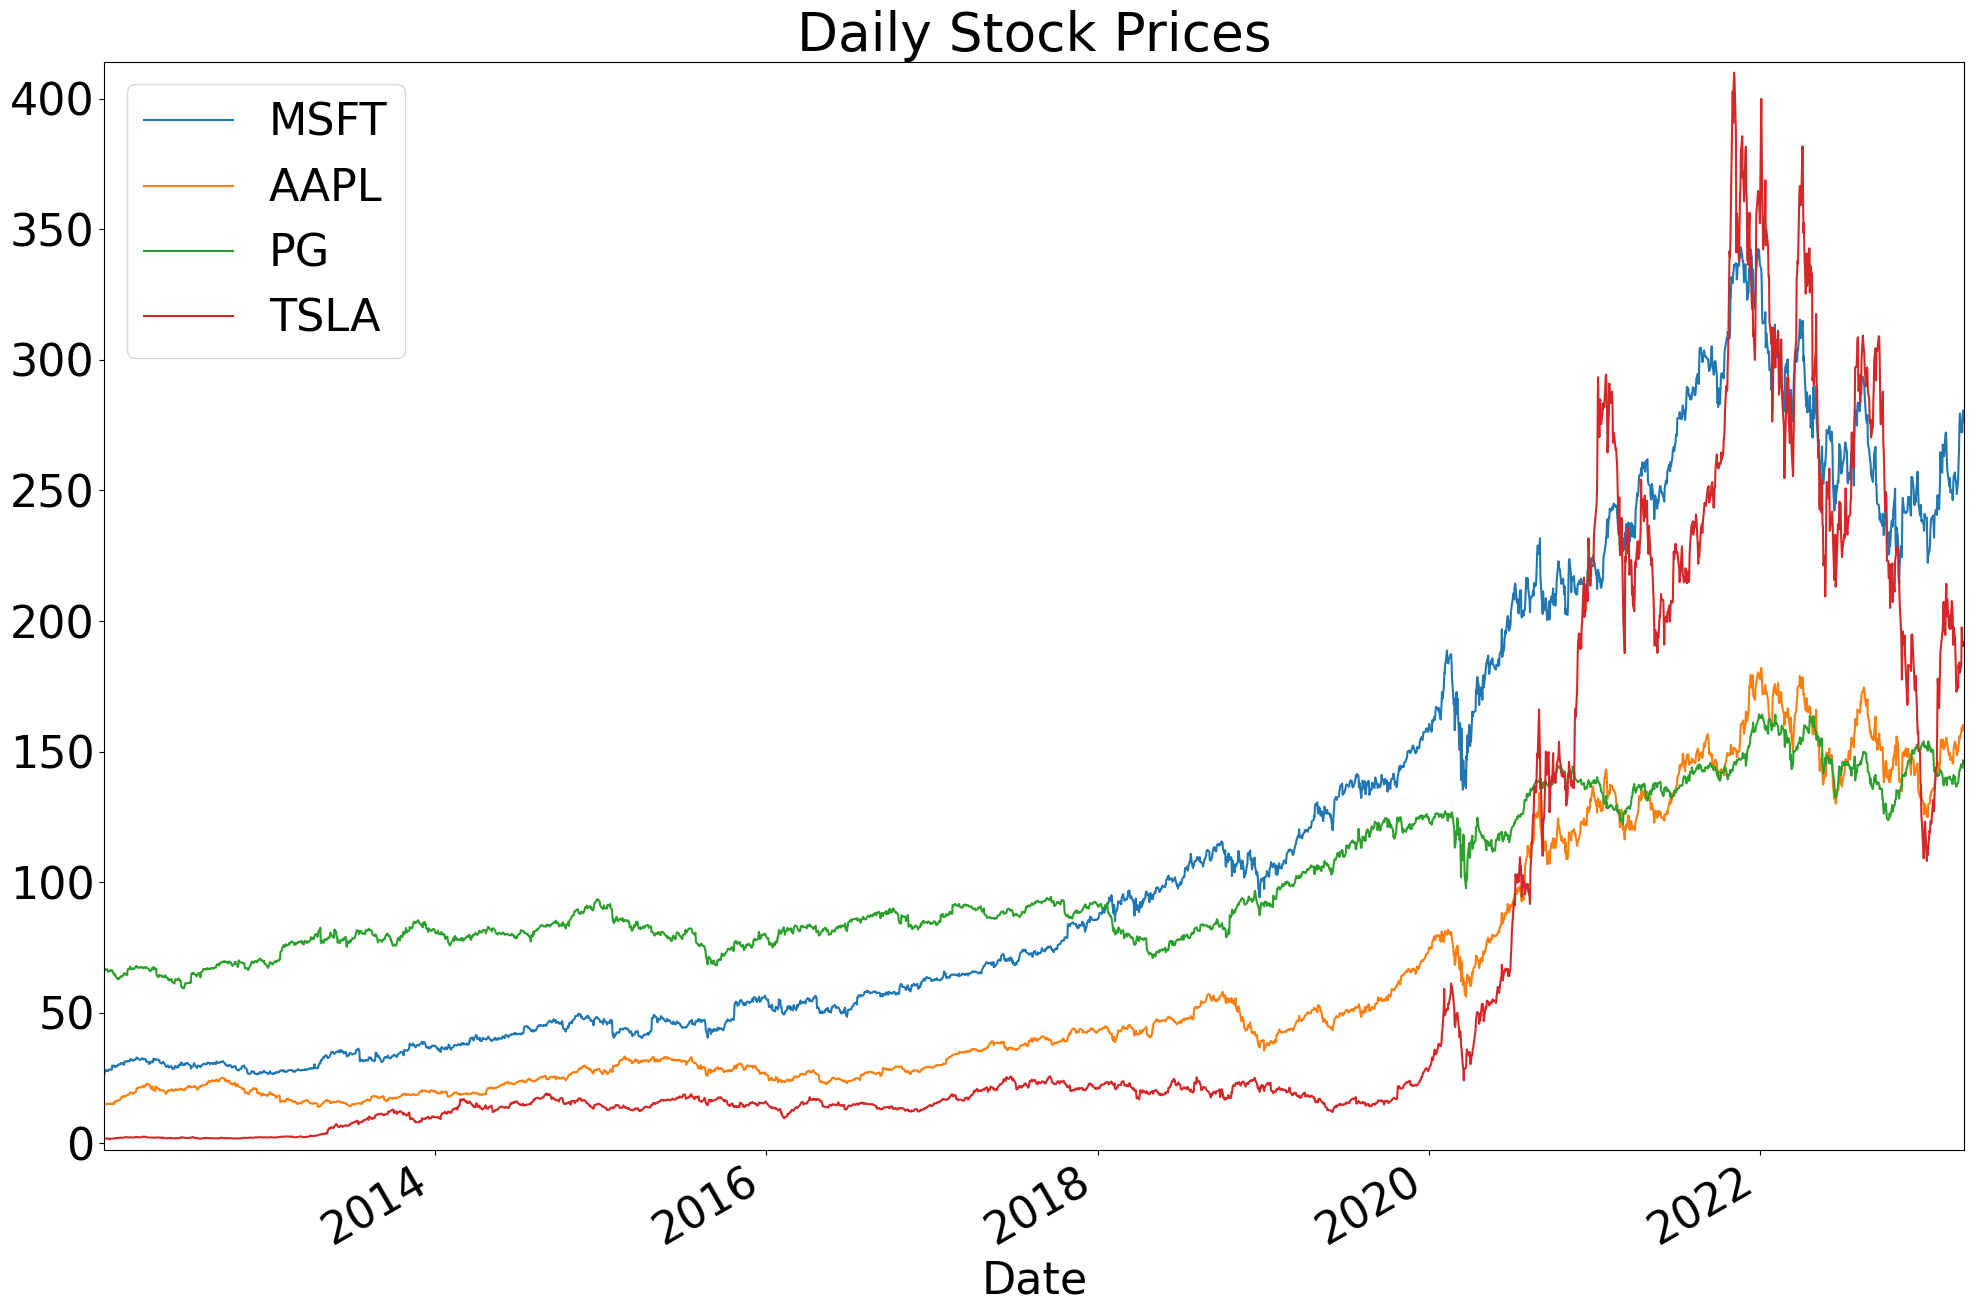

In [16]:
plt.rcParams['axes.xmargin'] = 0
plt.rcParams['axes.ymargin'] = 0.01
plt.rcParams.update({'font.size': 32})
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (24, 16))
close_data.plot.line(ax = ax, legend = True)
ax.set_title("Daily Stock Prices")


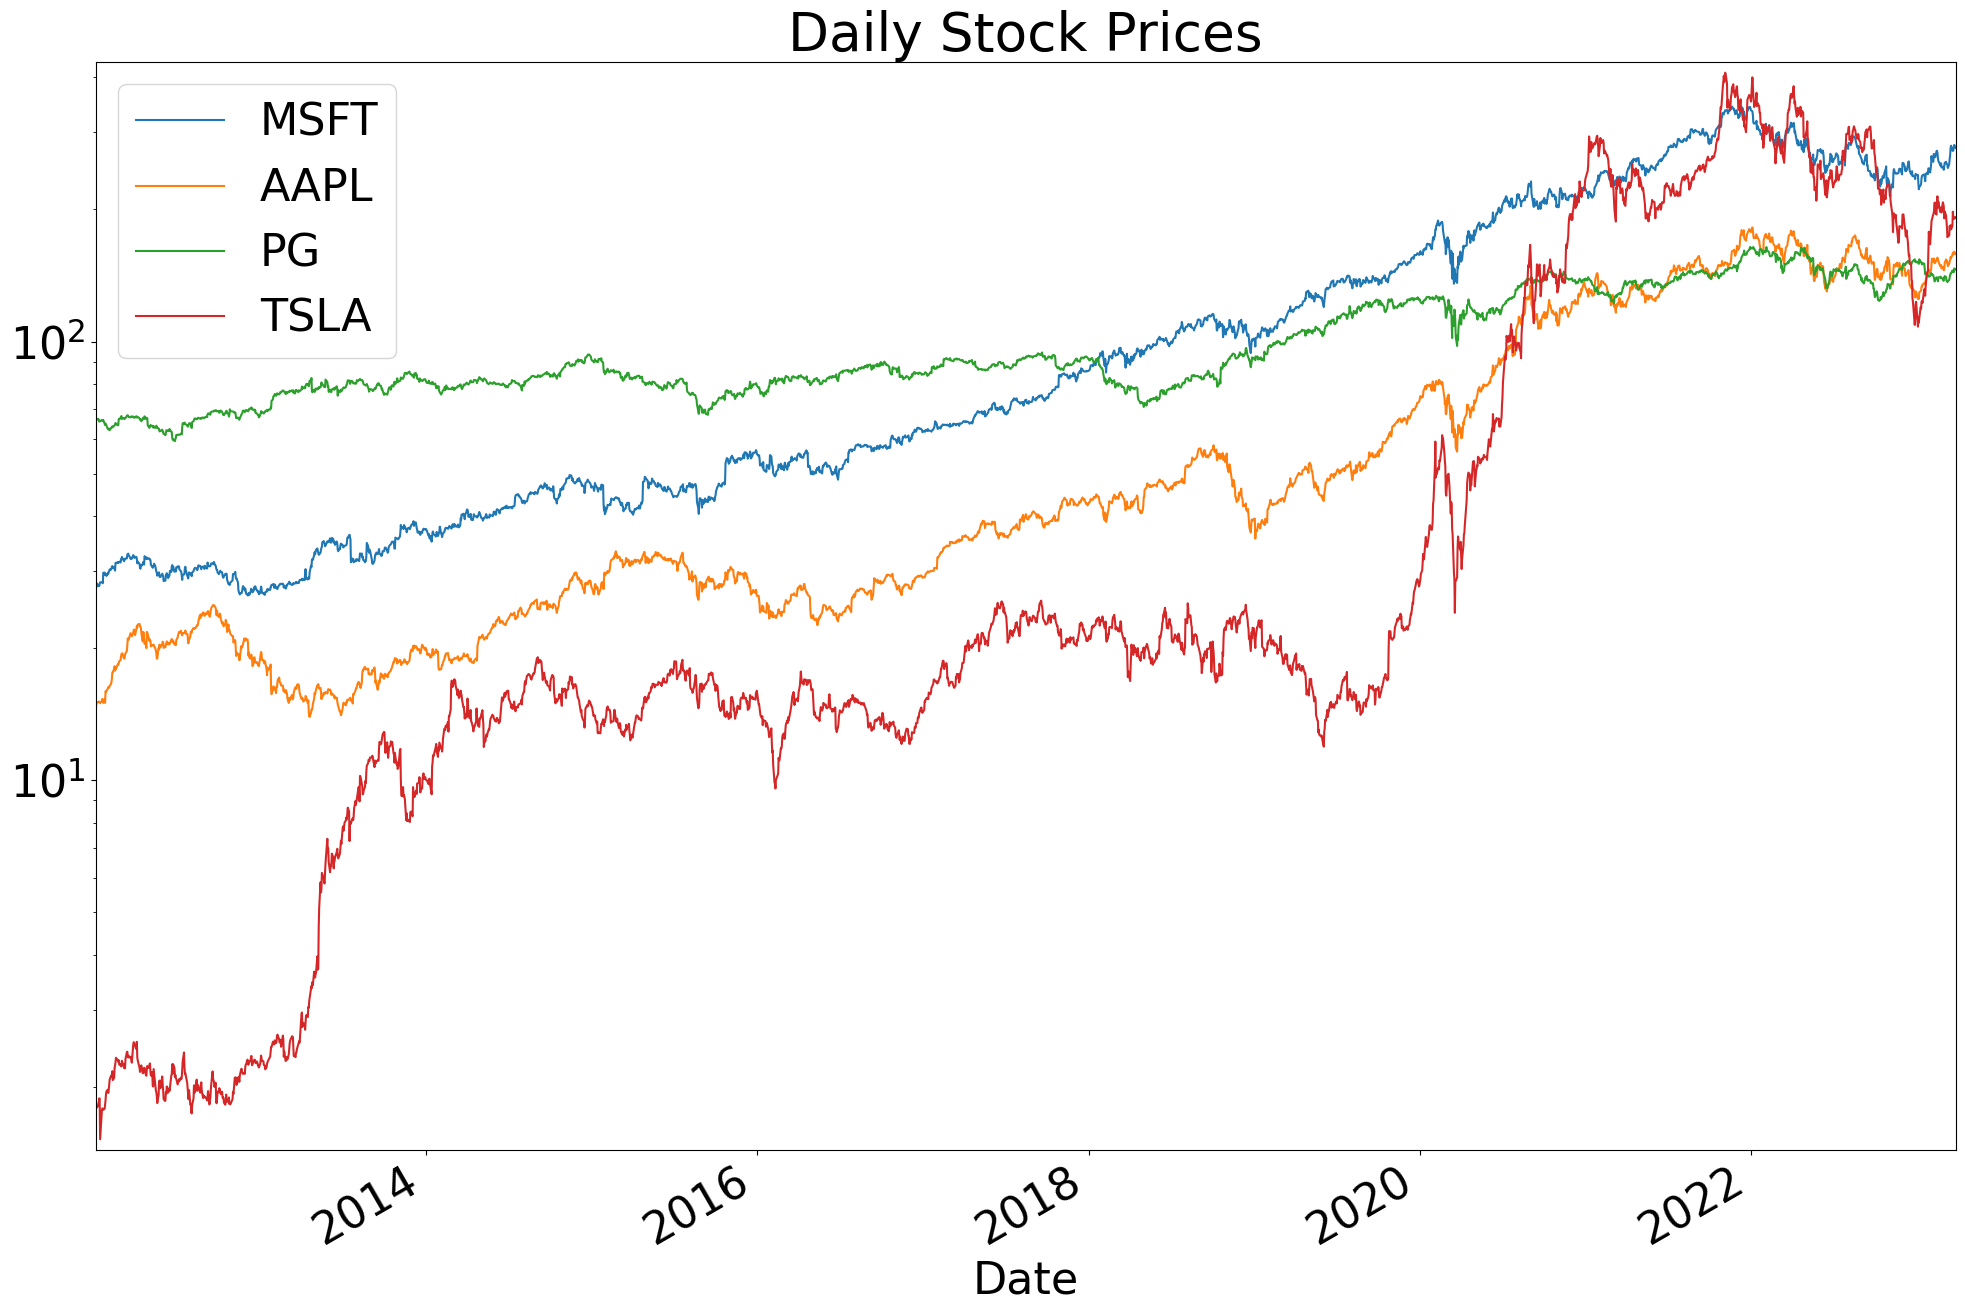

In [17]:
fig, ax = plt.subplots(figsize = (24, 16))
close_data.plot.line(ax = ax, legend = True)
ax.set_title("Daily Stock Prices")
# must log the time series data, which will estimate rates without bias 
# makes sure the magnitudes of the changes are equal 
ax.set_yscale("log")


Text(0.5, 1.0, 'AAPL')

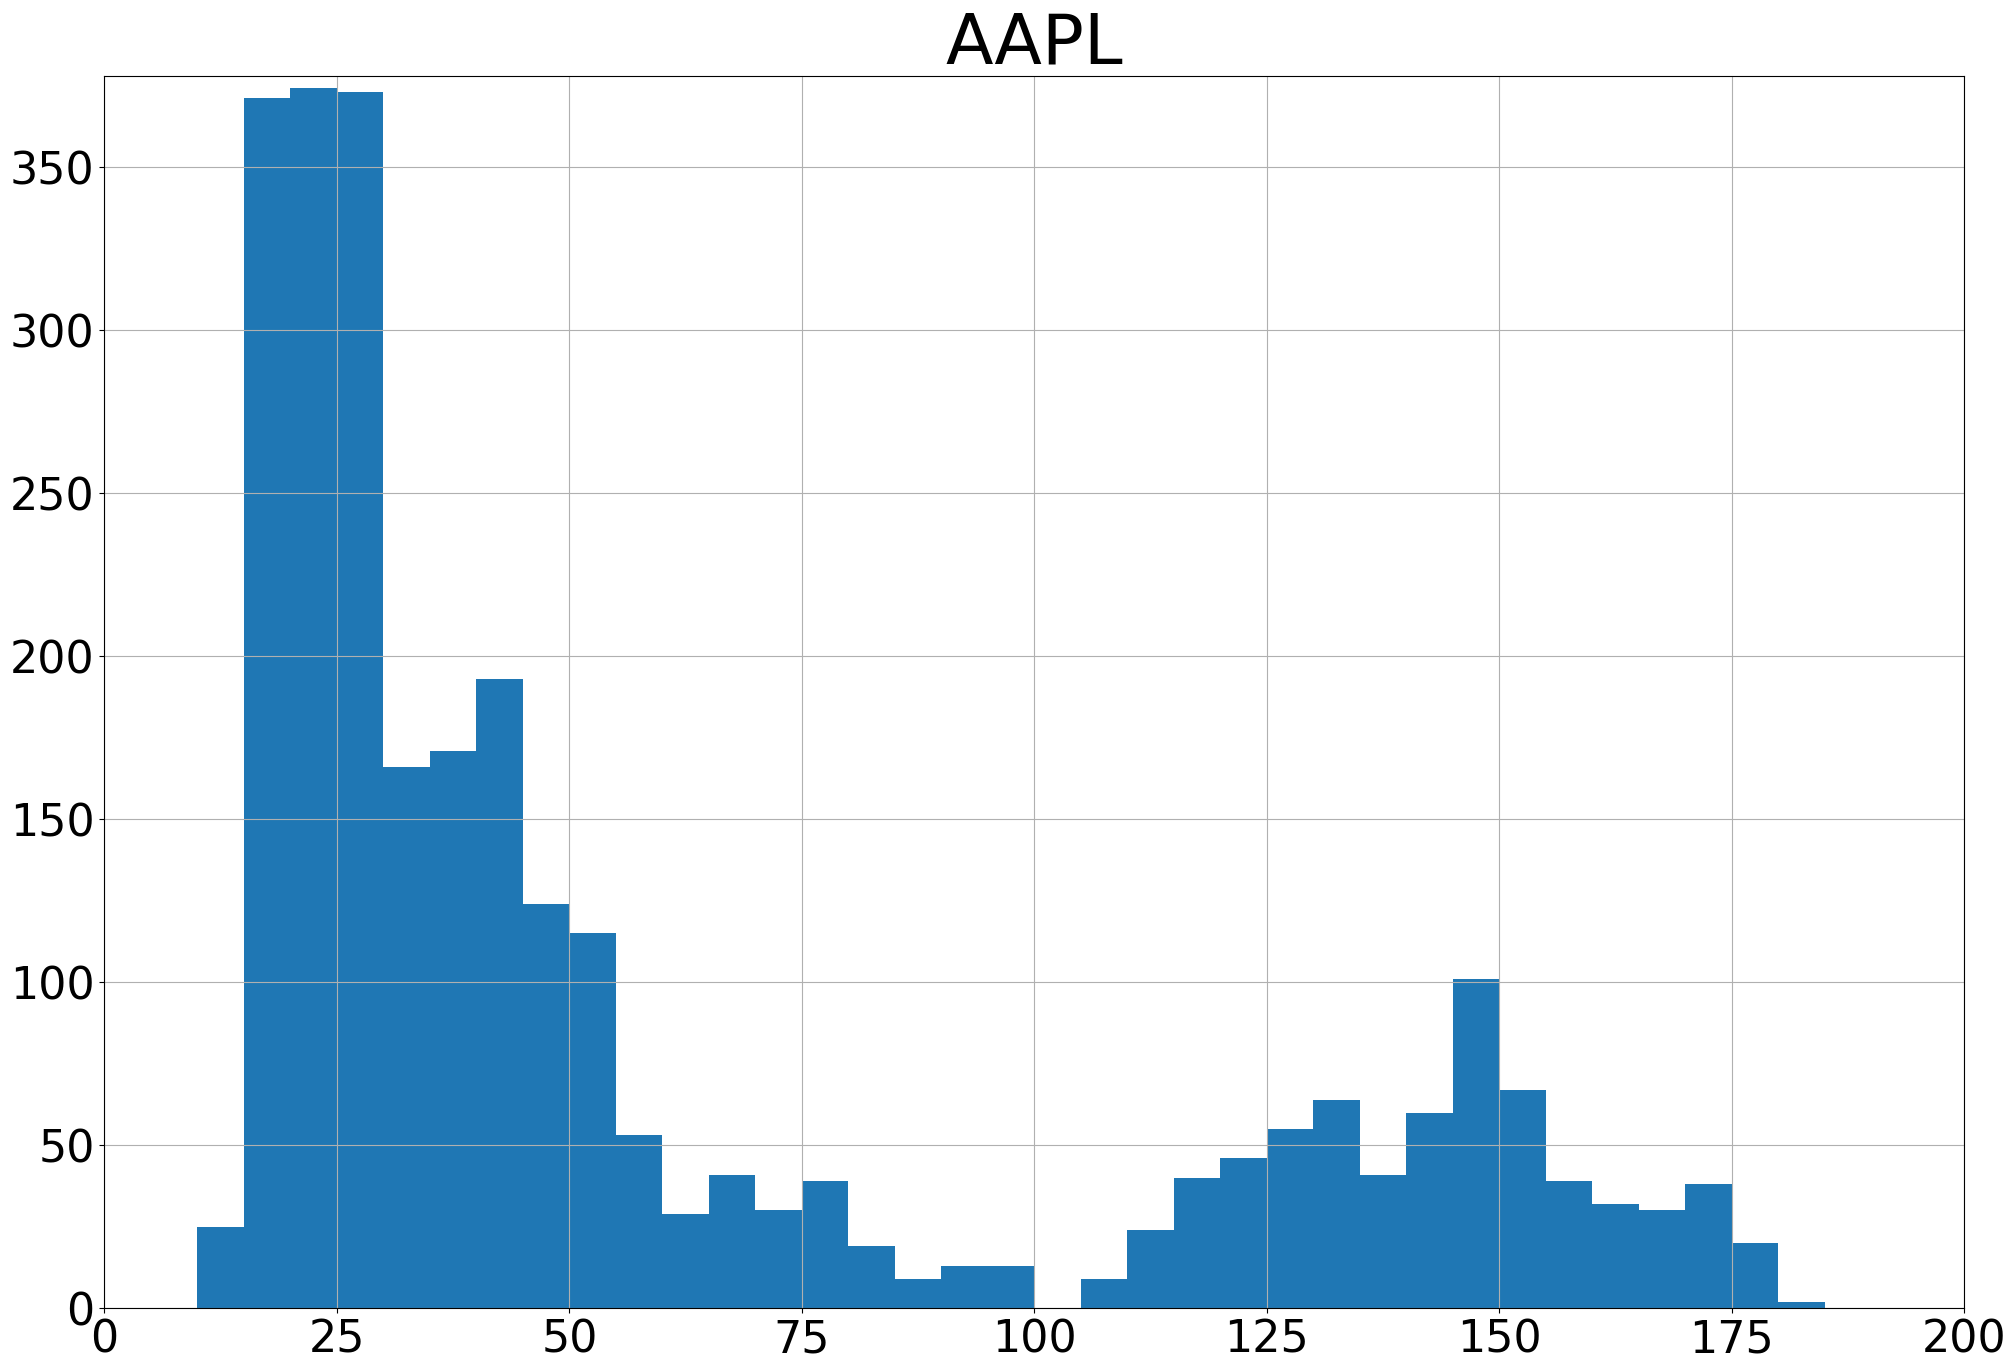

In [18]:
fig, ax = plt.subplots(figsize = (24, 16))
stock = "AAPL"
close_data[stock].hist(bins = [i for i in range(0,201,5)])
# close_data[stock].hist(bins = 50)
ax.set_title(stock, fontsize = 50)


In [19]:
log_data = np.log(close_data)
log_data

,MSFT,AAPL,PG,TSLA
Date,,,,
2012-01-03,3.287282,2.686948,4.202152,0.627007
2012-01-04,3.310543,2.692308,4.201703,0.613743
2012-01-05,3.320710,2.703349,4.197503,0.592221
2012-01-06,3.336125,2.713748,4.195094,0.584448
2012-01-09,3.322875,2.712161,4.199305,0.597003
...,...,...,...,...
2023-03-21,5.612325,5.070664,4.970369,5.286144
2023-03-22,5.606868,5.061519,4.969744,5.253058
2023-03-23,5.626397,5.068464,4.968354,5.258641


Text(0.5, 1.0, 'AAPL')

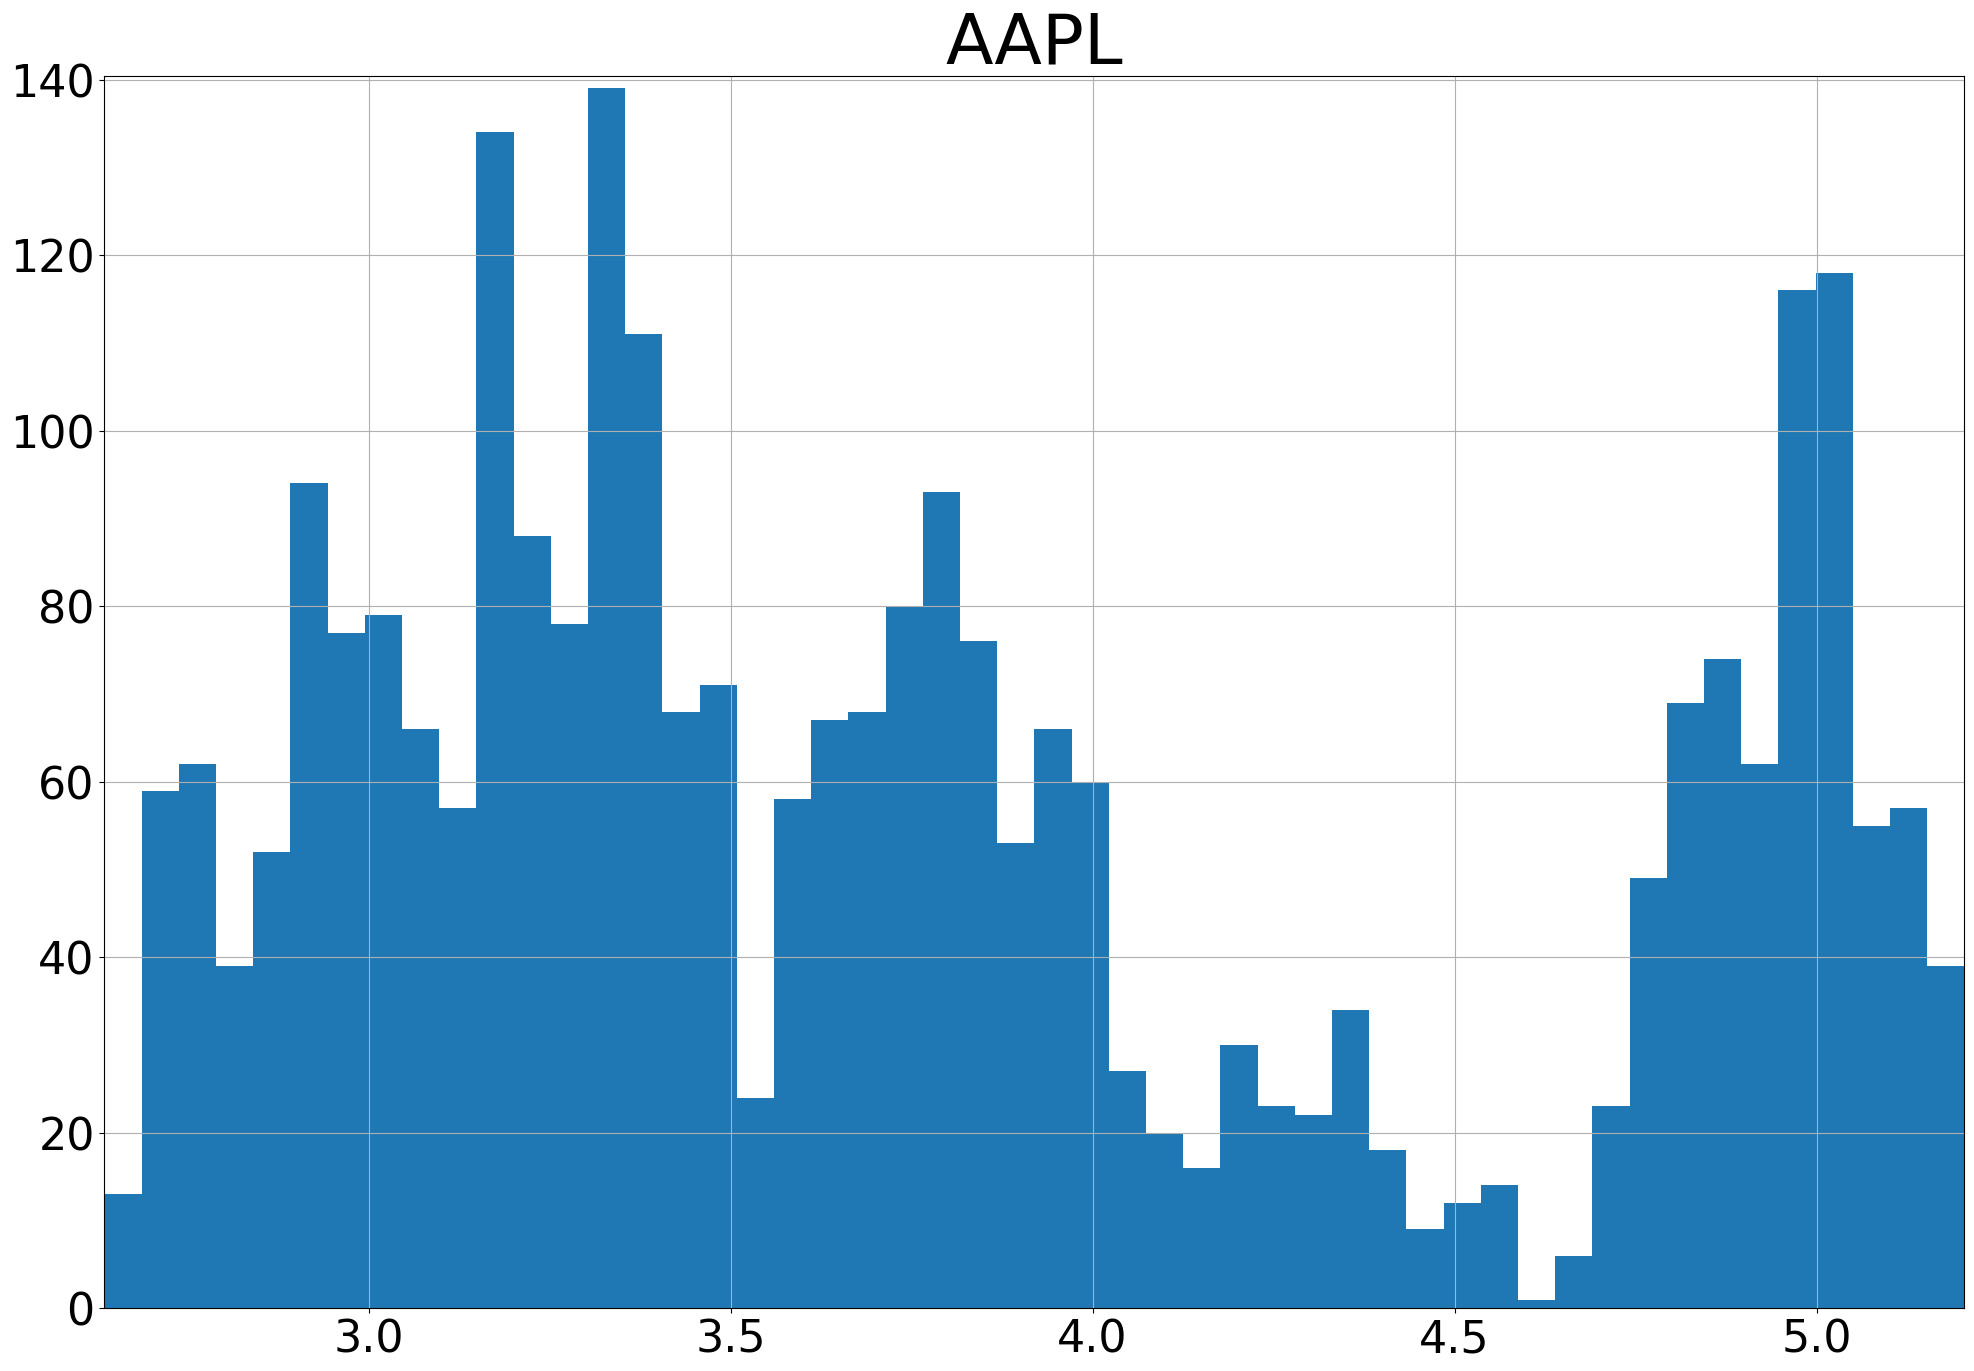

In [20]:
fig, ax = plt.subplots(figsize = (24, 16))
# using log_data instead of close_data
# easier when log the data to choose the bins
log_data[stock].hist(bins = 50)
ax.set_title(stock, fontsize = 50)

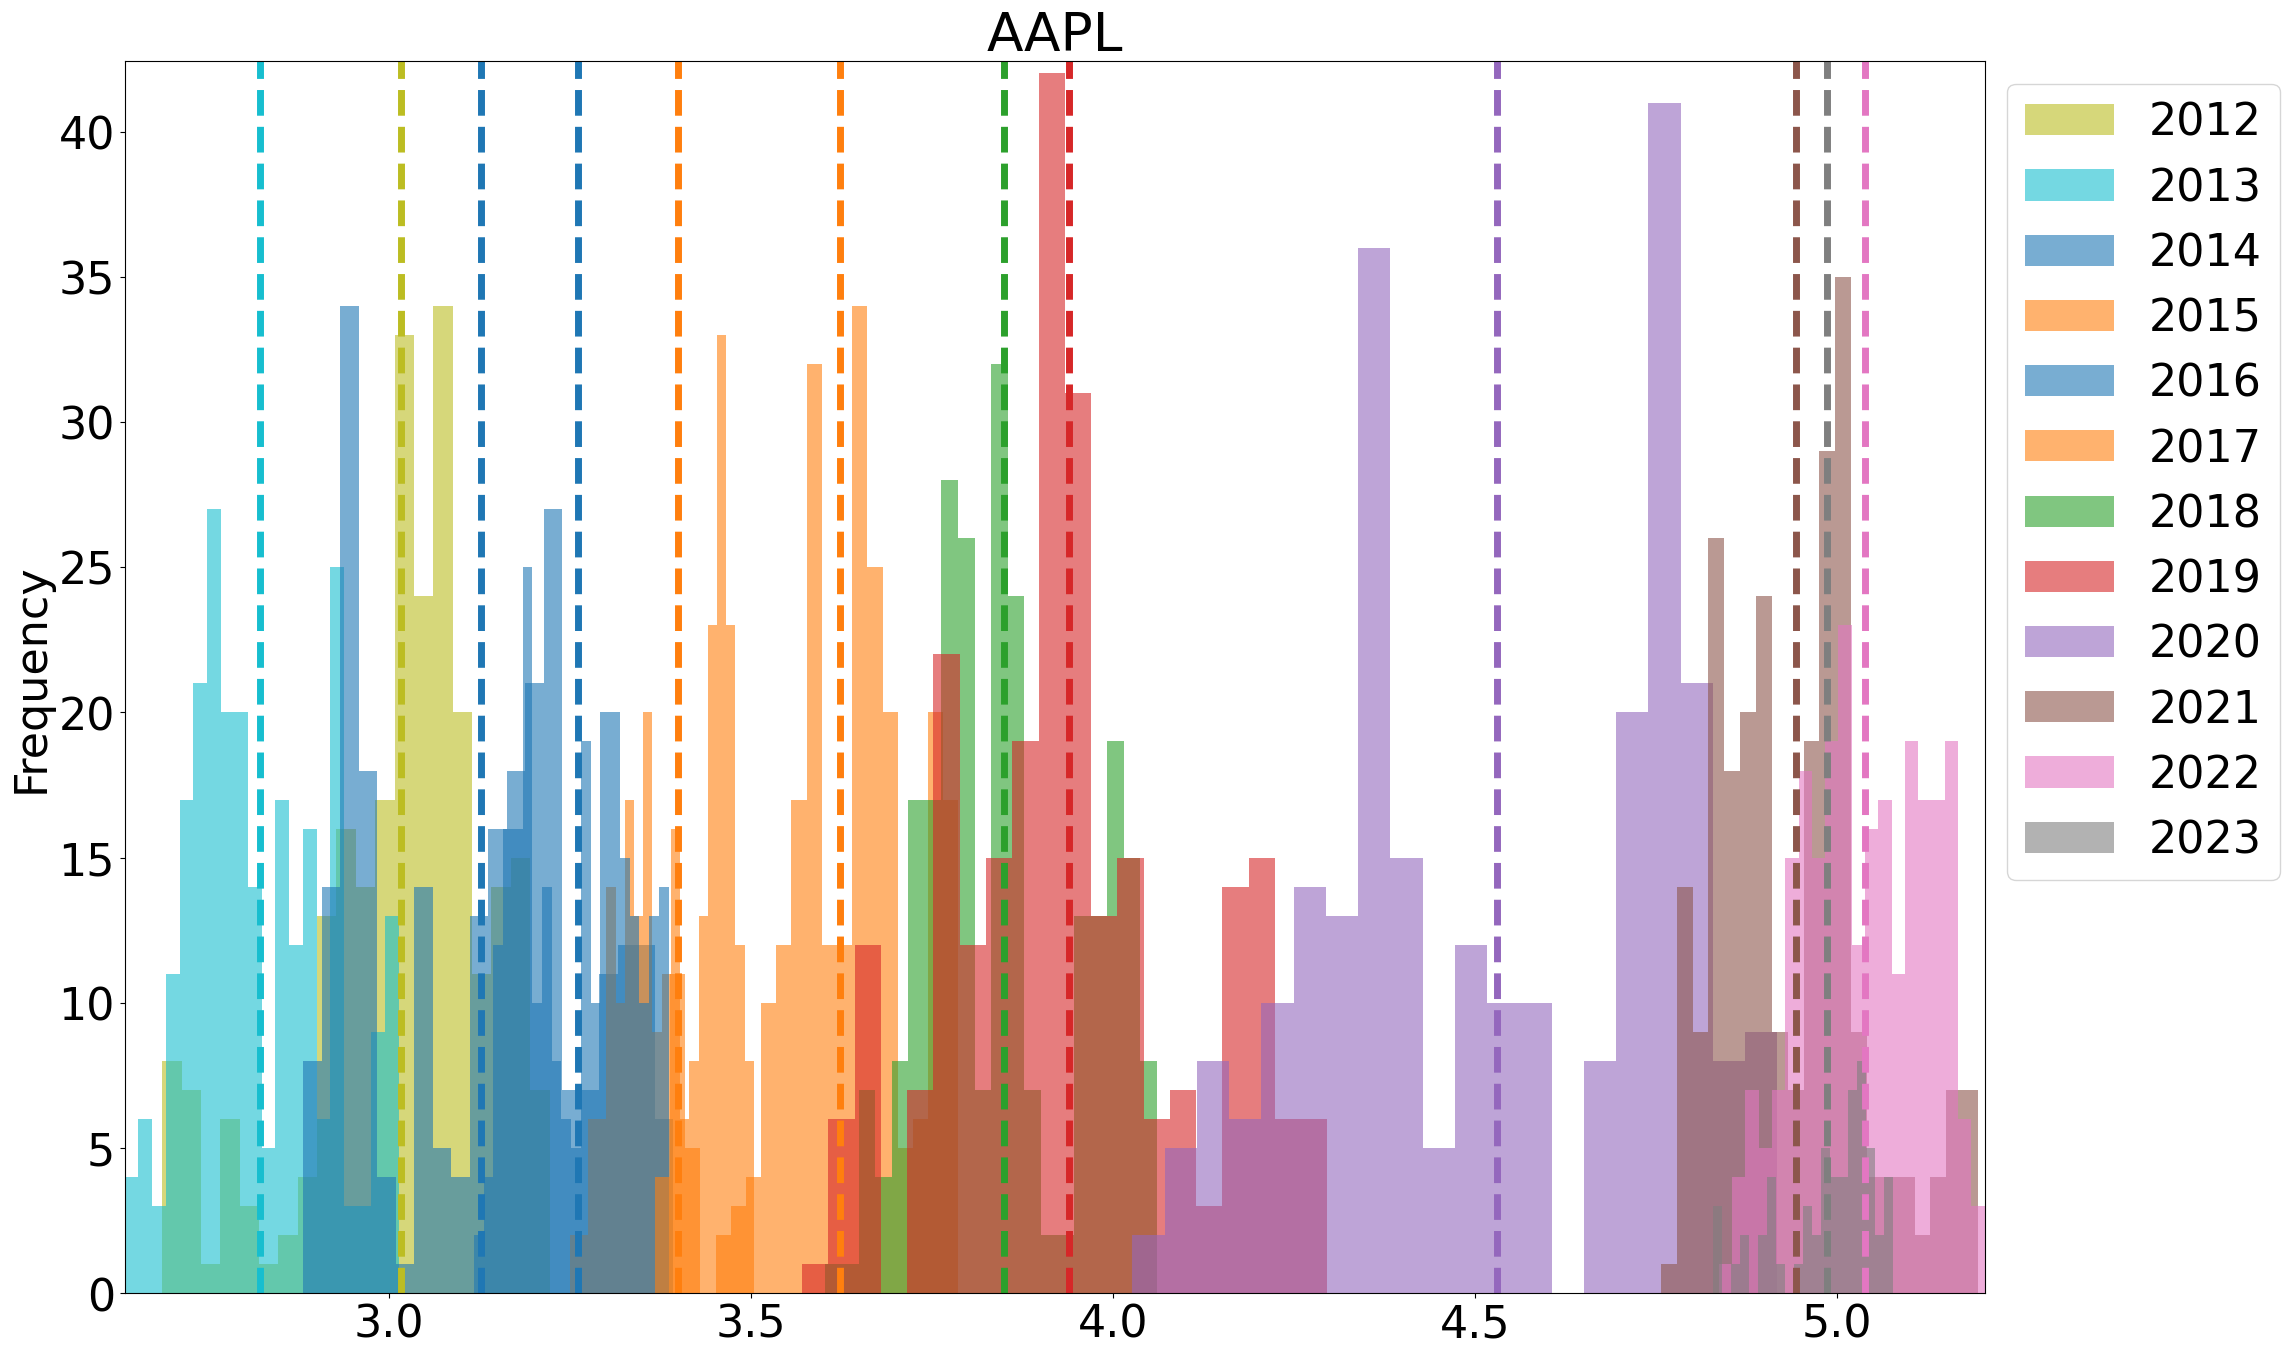

In [21]:
def graph_yearly_distributions(data, stock, figsize = (24,12), density = False):
    # sorting the data by years in order, letting colors indicate the year
    # seperating the data per year
    years = sorted(list(set(data.index.year)))
    fig, ax = plt.subplots(figsize = (24, 16))
    for year in years:
        color = "C" + str(year % 12)
        year = str(year)
        plot_data = data[stock].loc[year]
        plot_data.plot.hist(color = color,
                            alpha = .6,
                            # label turns to year instead of AAPL
                            label = year,
                            bins = 20,
                            density = density,
                            ax = ax)
        # Plotting the mean line per year
        ax.axvline(plot_data.mean(),
                  color = color,
                  linewidth = 5,
                  ls = "--")
        ax.set_title(stock)
        ax.legend(bbox_to_anchor = (1,1))
    
graph_yearly_distributions(log_data, stock, density = False)

In [22]:
# you get aproximate percent change of data but is symmetric in either 
# direction while taking log difference
# log diff gets consistent changes while 
# percent change function is not consistent
price_change_data = log_data.diff().mul(100)
price_change_data

,MSFT,AAPL,PG,TSLA
Date,,,,
2012-01-03,NaN,NaN,NaN,NaN
2012-01-04,2.326112,0.535969,-0.044898,-1.326441
2012-01-05,1.016714,1.104083,-0.420052,-2.152171
2012-01-06,1.541526,1.039955,-0.240813,-0.777346
2012-01-09,-1.325000,-0.158744,0.421051,1.255570
...,...,...,...,...
2023-03-21,0.567752,1.187335,-0.726121,7.529223
2023-03-22,-0.545715,-0.914514,-0.062482,-3.308515
2023-03-23,1.952965,0.694529,-0.139004,0.558213


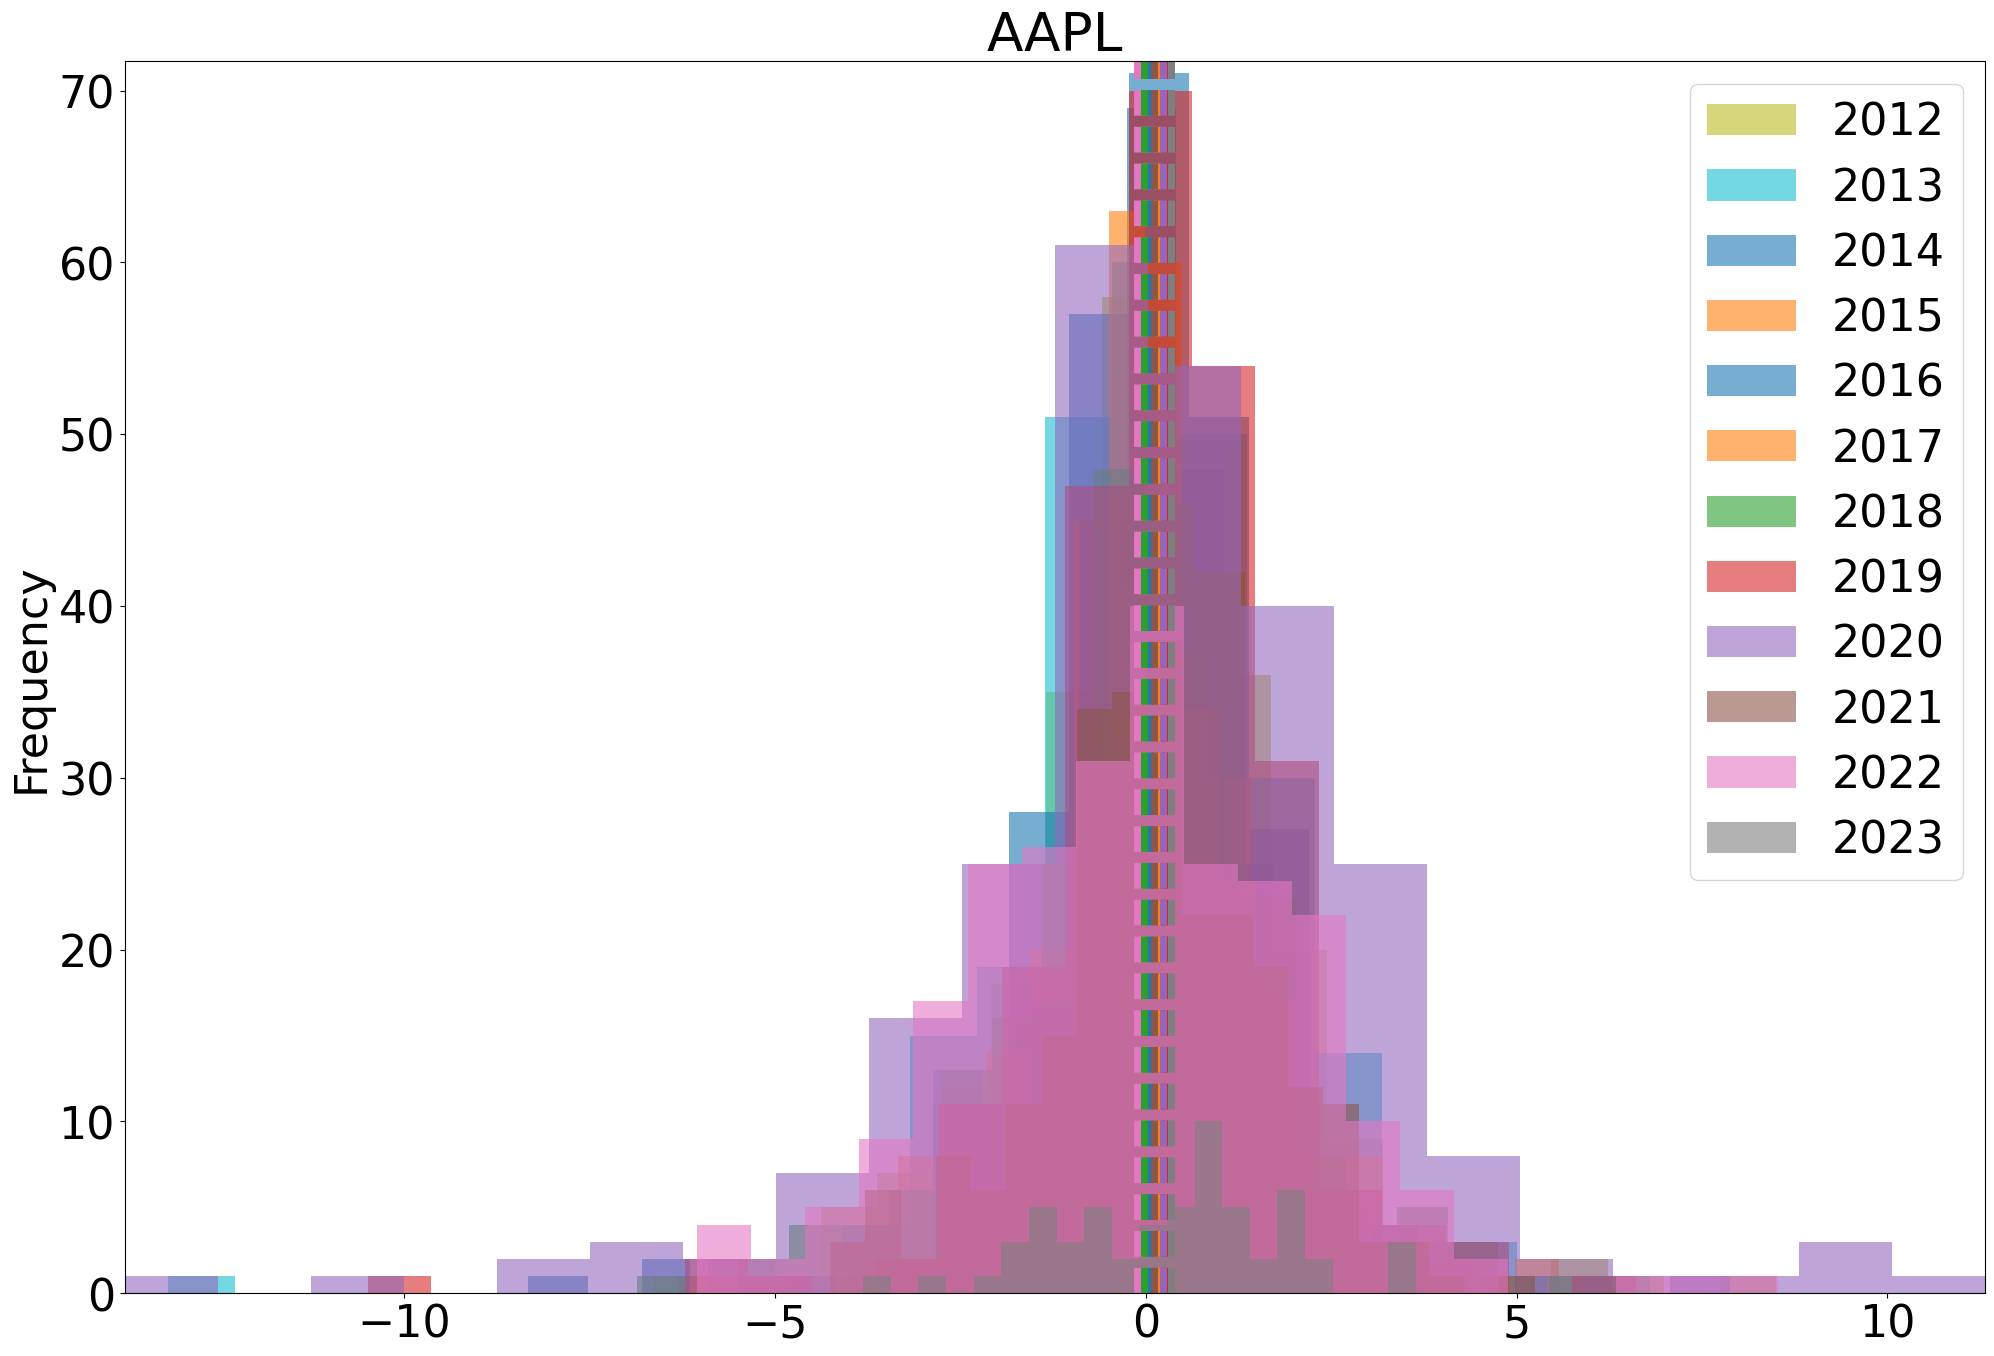

In [23]:
graph_yearly_distributions(price_change_data, stock, density = False)

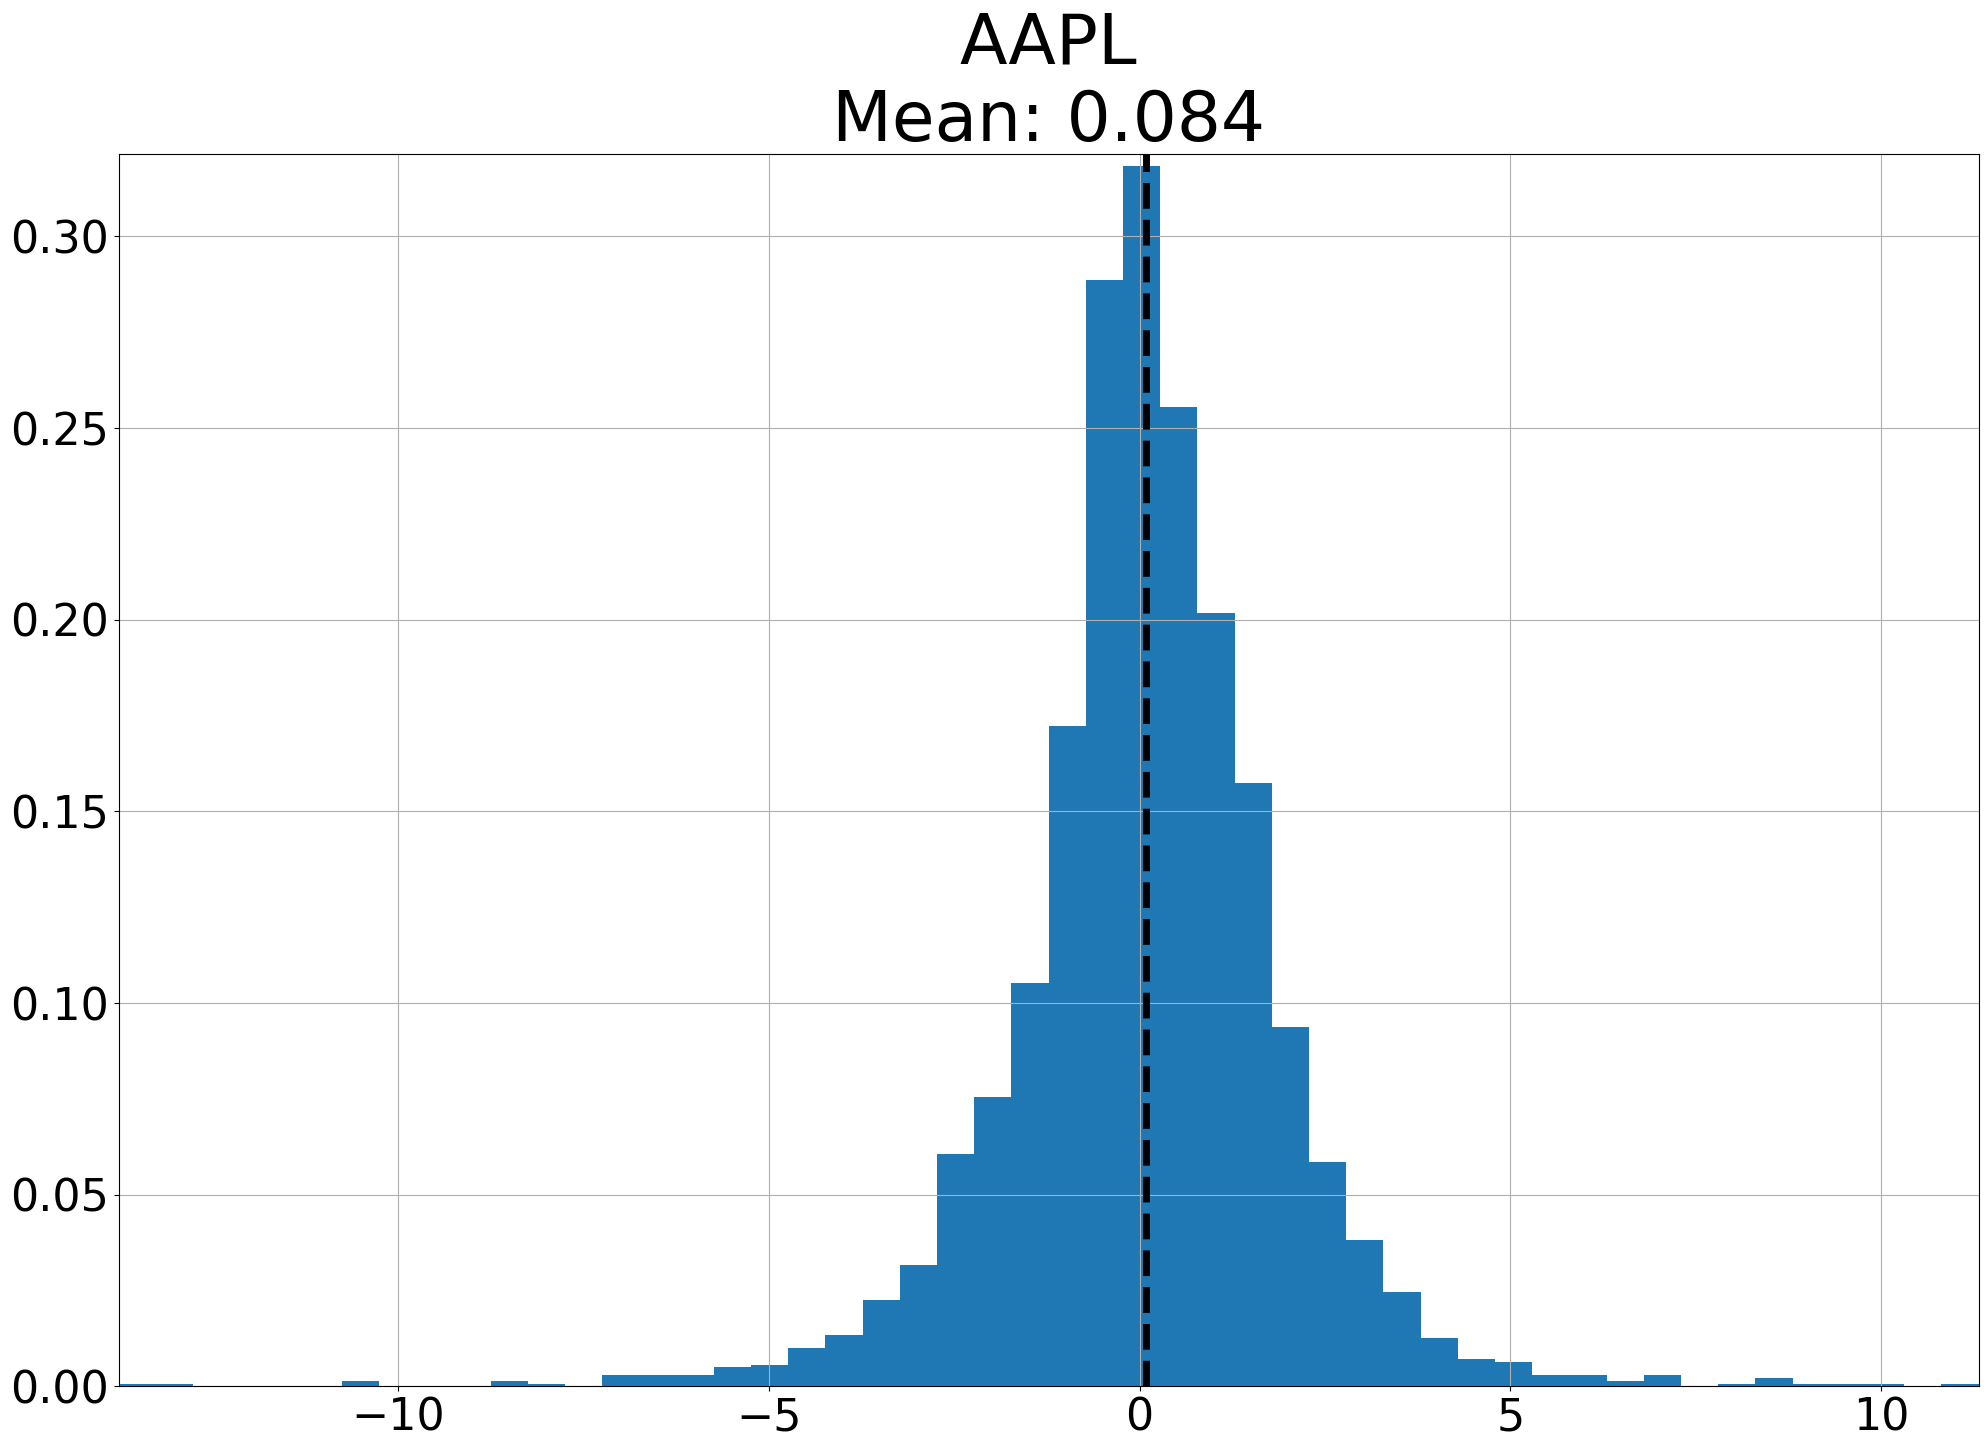

In [24]:
# full distribution not seperated by year
fig, ax = plt.subplots(figsize = (24, 16))
stock = "AAPL"
price_change_mean = round(price_change_data[stock].mean(),3)
price_change_data[stock].dropna().hist(bins = 50, density = True)
ax.set_title(stock + "\nMean: " + str(price_change_mean), fontsize = 50)
ax.axvline(price_change_mean, color = "k", linewidth = 5, 
          ls ="--")

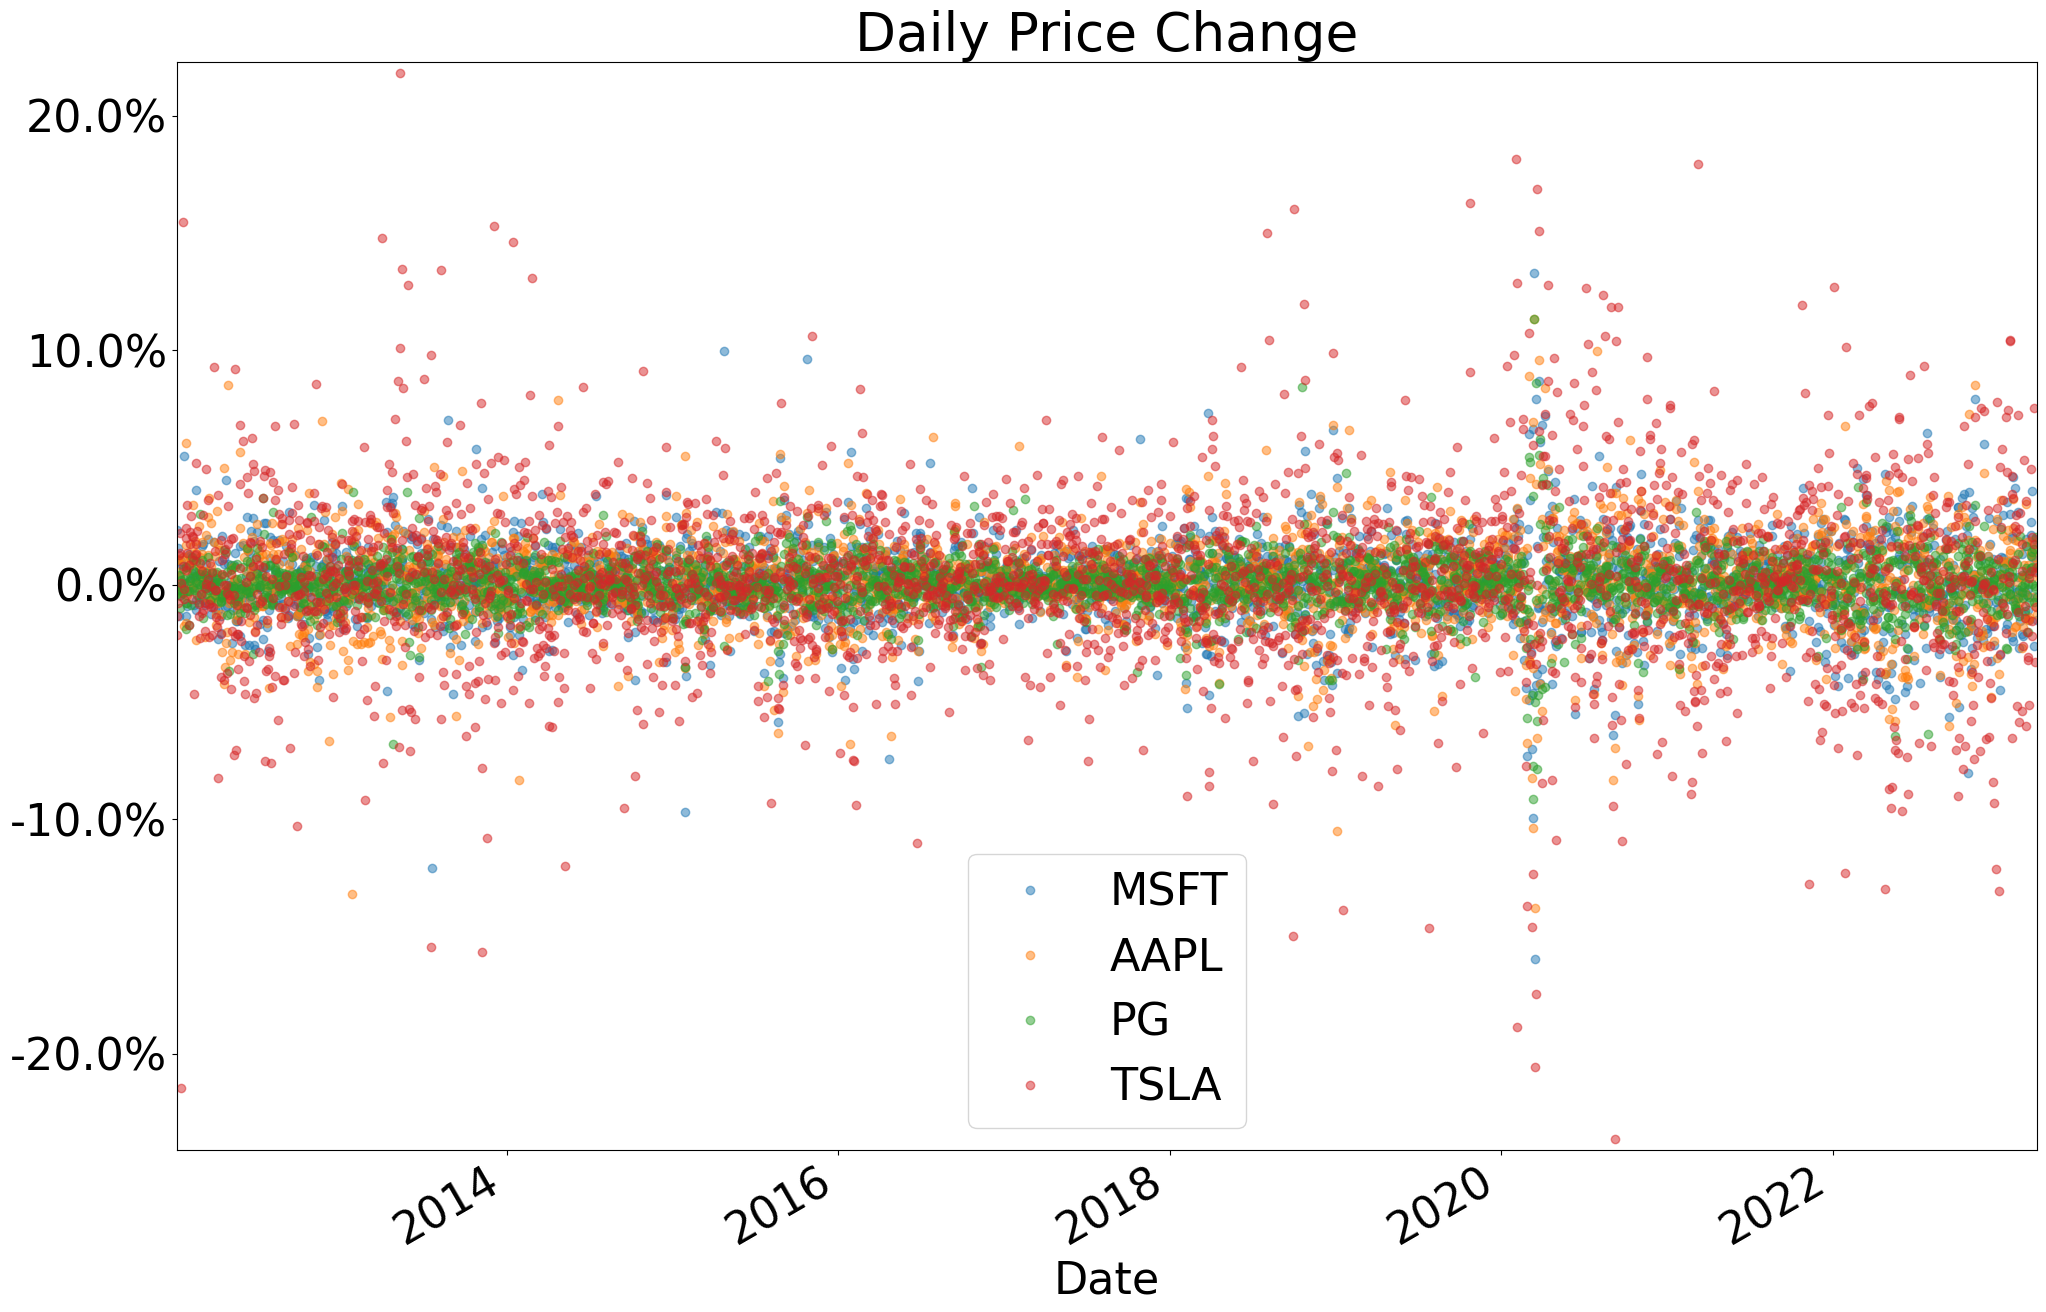

In [25]:
fig, ax = plt.subplots(figsize = (24, 16))
for key in price_change_data.keys():
    price_change_data[key].plot.line(marker = ".",
                                     markersize = 12,
                                     alpha = .5,
                                     ls = "",
                                     ax =ax)
ax.set_title("Daily Price Change")
# access y-axis values
y_vals = ax.get_yticks()
# transform y-axis values to be in form of percent instead of decimal
ax.set_yticklabels([str(round(y,1)) + "%" for y in y_vals])
plt.legend()

In [26]:
stat_df = gather_statistics(price_change_data.mul(100), 
                             sample = True).round(2)
stat_df

,MSFT,AAPL,PG,TSLA
mean,8.26,8.42,2.76,16.39
median,6.38,7.65,3.61,13.45
variance,28215.61,33531.64,12864.11,128655.70
S.D.,167.98,183.12,113.42,358.69
skewness,-0.22,-0.28,-0.04,-0.05
kurtosis,8.73,5.72,12.02,5.06


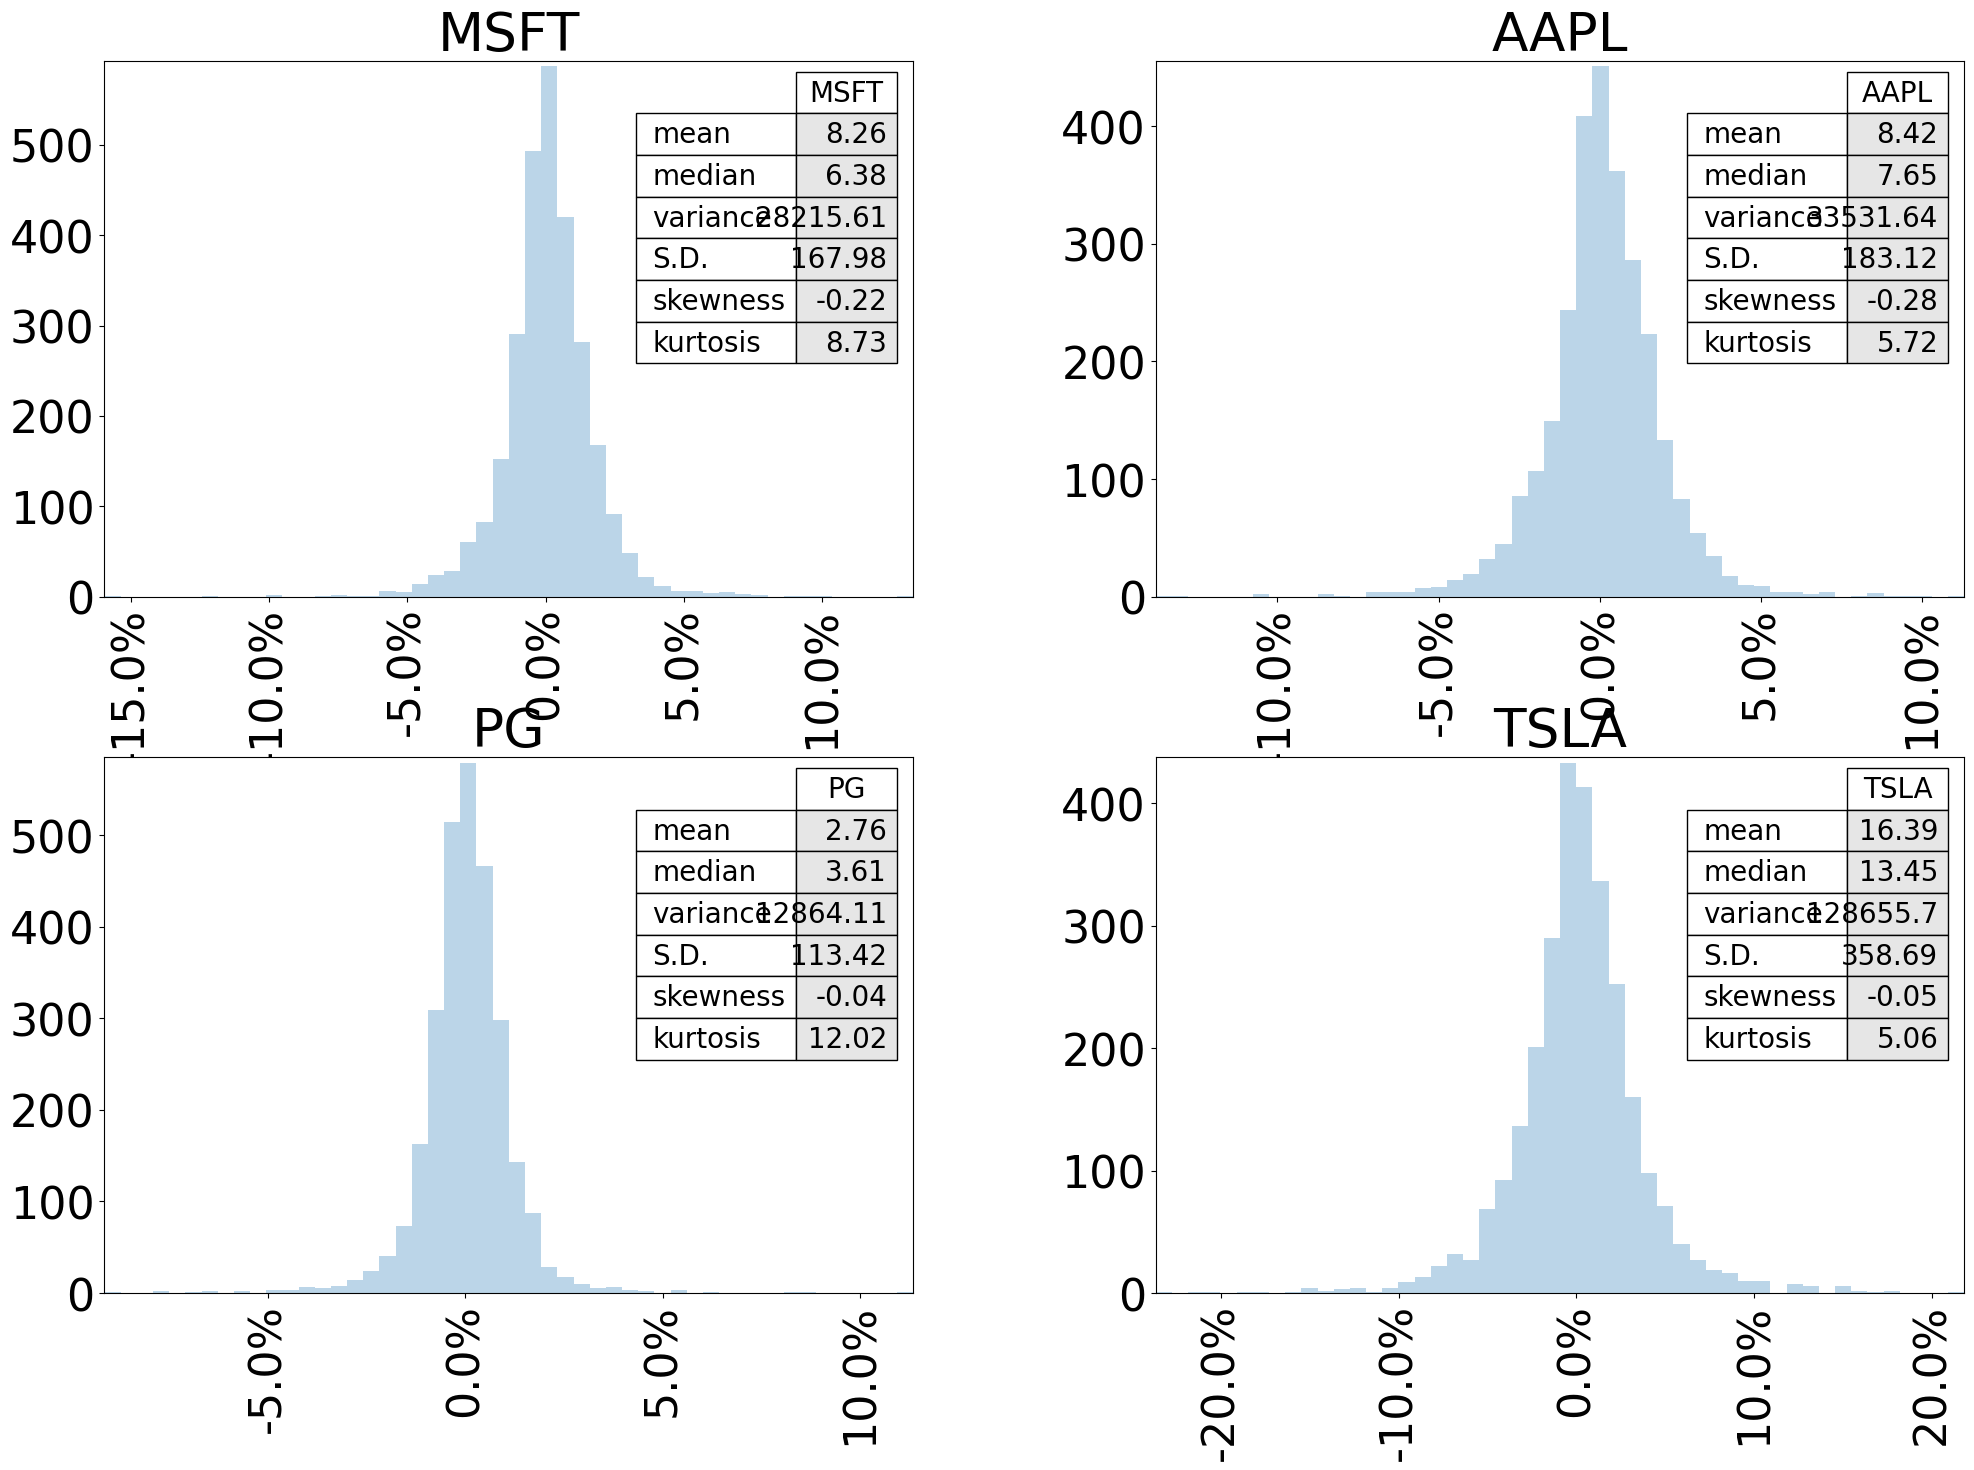

In [27]:
from pandas.plotting import table

# axs is a list of lists
#sublists contain relevant axes that comprise the multiplot

fig, axs = plt.subplots(2,2, figsize = (24, 16))
price_change_data.hist(bins = 50,
                      alpha = .3,
                      label = price_change_data.keys(),
                      ax = axs,
                      density = False)
# adjust the xtick labels in a multiplot by using a for loop
# to access sublists
for sublist in axs:
# and to access elements in each sublist
    for ax in sublist:
        x_vals = ax.get_xticks()
        # editing the x axis labels 
        ax.set_xticklabels([str(round(x,1)) + "%" for x in x_vals],
                         rotation = 90)
        stock = ax.get_title()
        hist_data = stat_df[stock]
        
        stat = table(ax, hist_data,
                    colWidths = [.1],
                    cellColours = [[(.9,.9,.9)]] *6,
                    loc = "upper right")
        stat.scale(1.25,2.5)
        stat.auto_set_font_size(False)
        stat.set_fontsize(20)
        ax.grid(False)
        

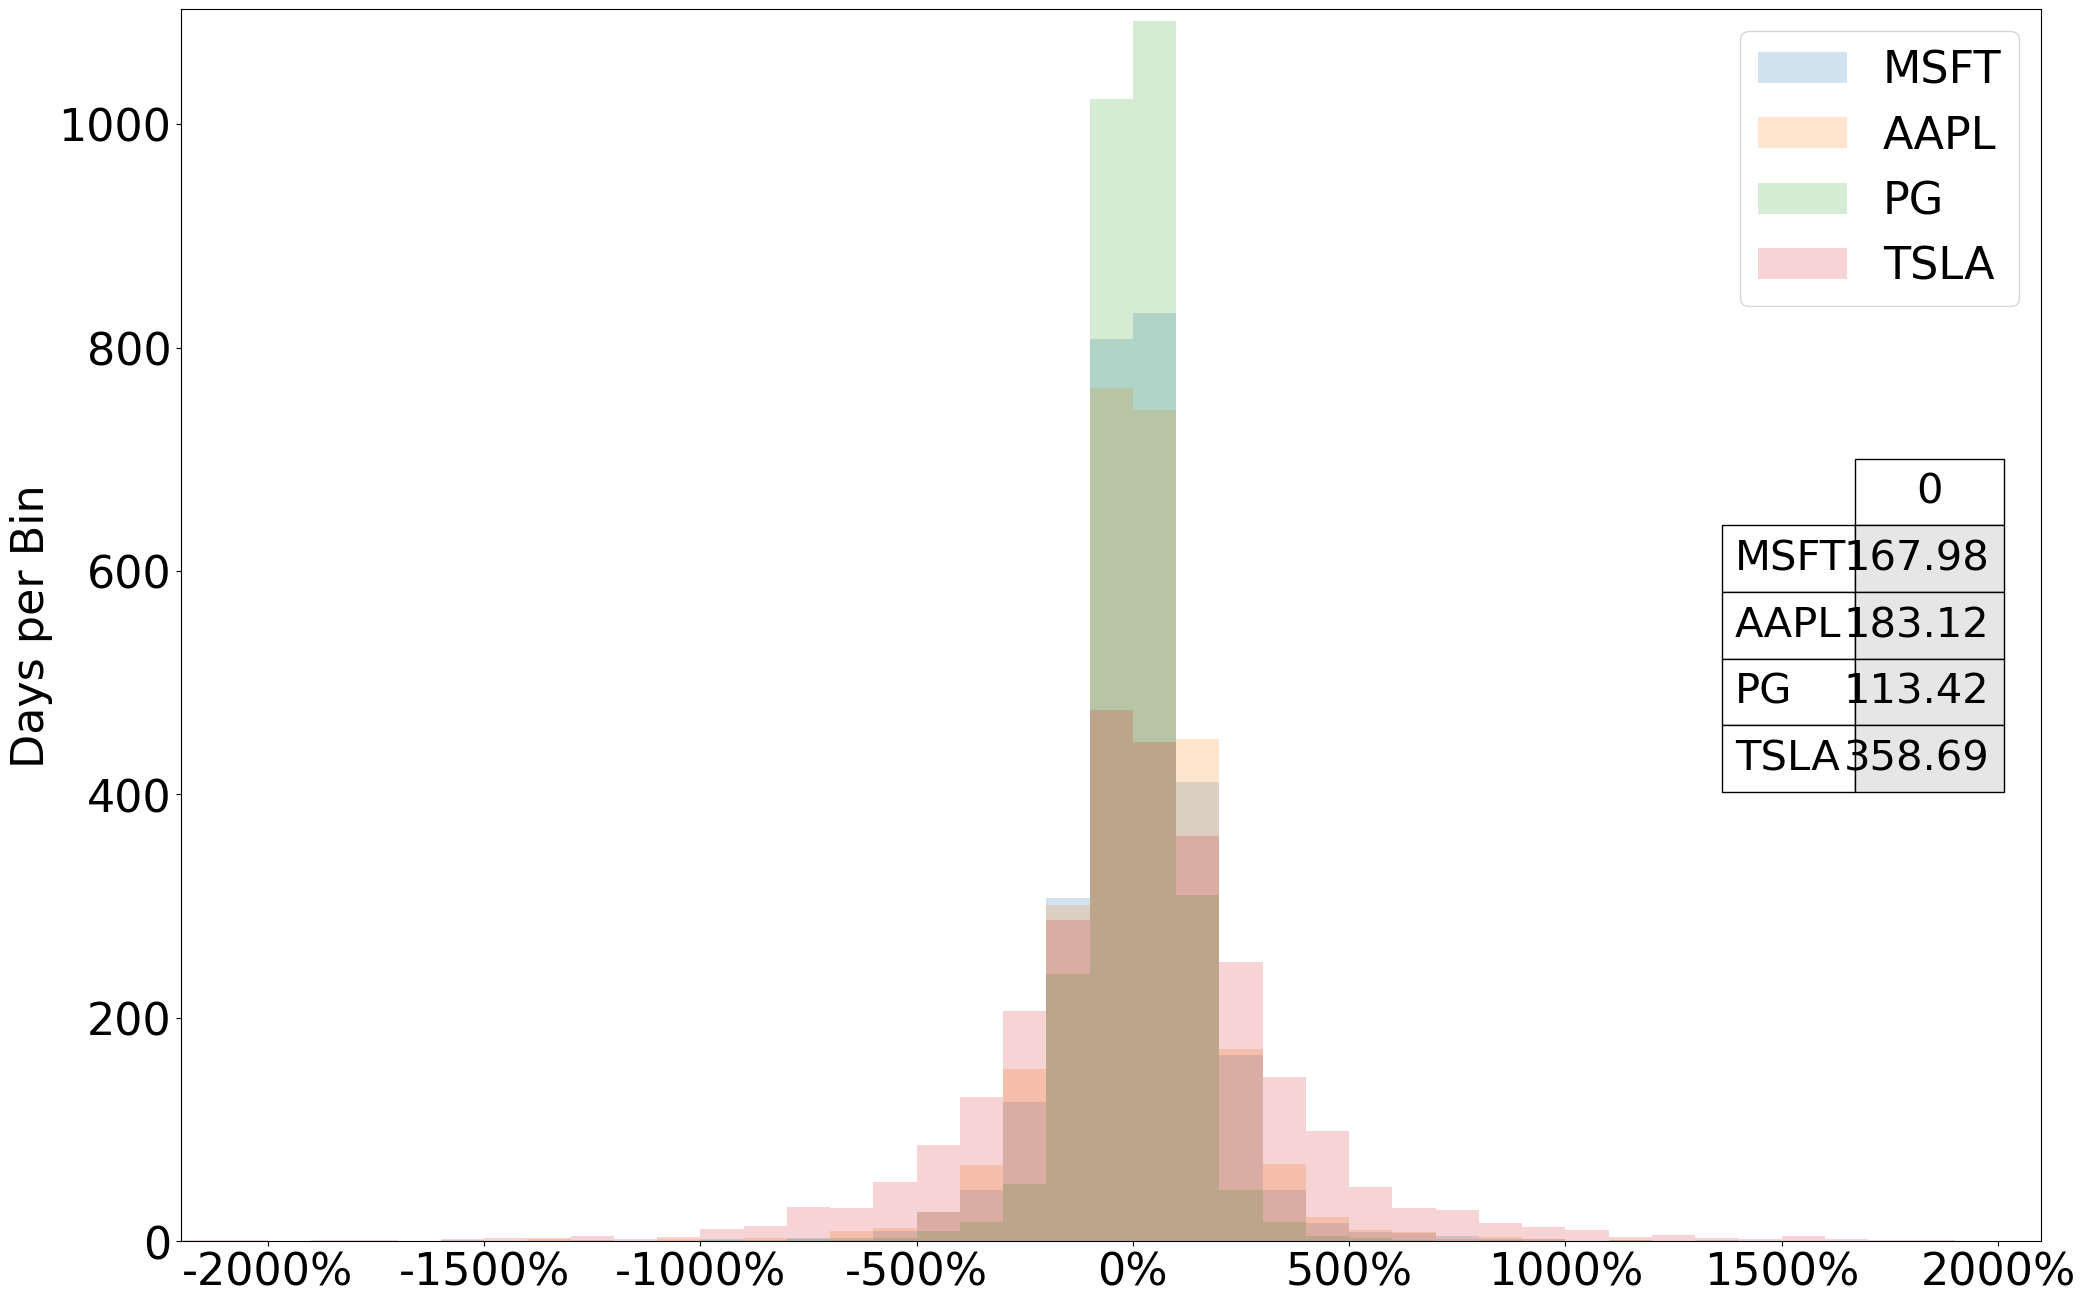

In [28]:
plot_data = price_change_data.mul(100)
fig, ax = plt.subplots(figsize = (24, 16))
for key in price_change_data:
    # set bins to be length of 1%
    plot_data[key].hist(bins = [x for x in range(-2200,2200,100)],
                               alpha = .2,
                               label = key,
                               density = False,
                               ax = ax)
    
ax.set_ylabel("Days per Bin")
x_vals = ax.get_xticks()
ax.set_xticklabels([str(int(x)) + "%" for x in x_vals])
# create the std dataframe
std_df = round(plot_data.std(),2)
# std_df.rename(columns = {0:"SD"},
 #             inplace = True)
stats = table(ax,
             std_df,
             colWidths=[.1],
             cellColours=[[(.9,.9,.9)]]*4,
             loc = "center right")
stats.scale(.8,4)
stats.auto_set_font_size(False)
stats.set_fontsize(30)
ax.grid(False)
plt.legend()

In [29]:
plot_data.std().divide(100)

MSFT    1.679750
AAPL    1.831165
PG      1.134200
TSLA    3.586861
dtype: float64

In [30]:
# measure data in terms of SD
norm_plot_data = price_change_data.div(price_change_data.std())
norm_plot_data

,MSFT,AAPL,PG,TSLA
Date,,,,
2012-01-03,NaN,NaN,NaN,NaN
2012-01-04,1.384797,0.292693,-0.039586,-0.369806
2012-01-05,0.605277,0.602940,-0.370351,-0.600015
2012-01-06,0.917712,0.567920,-0.212320,-0.216721
2012-01-09,-0.788808,-0.086690,0.371232,0.350047
...,...,...,...,...
2023-03-21,0.337998,0.648405,-0.640205,2.099112
2023-03-22,-0.324879,-0.499416,-0.055089,-0.922398
2023-03-23,1.162652,0.379283,-0.122556,0.155627


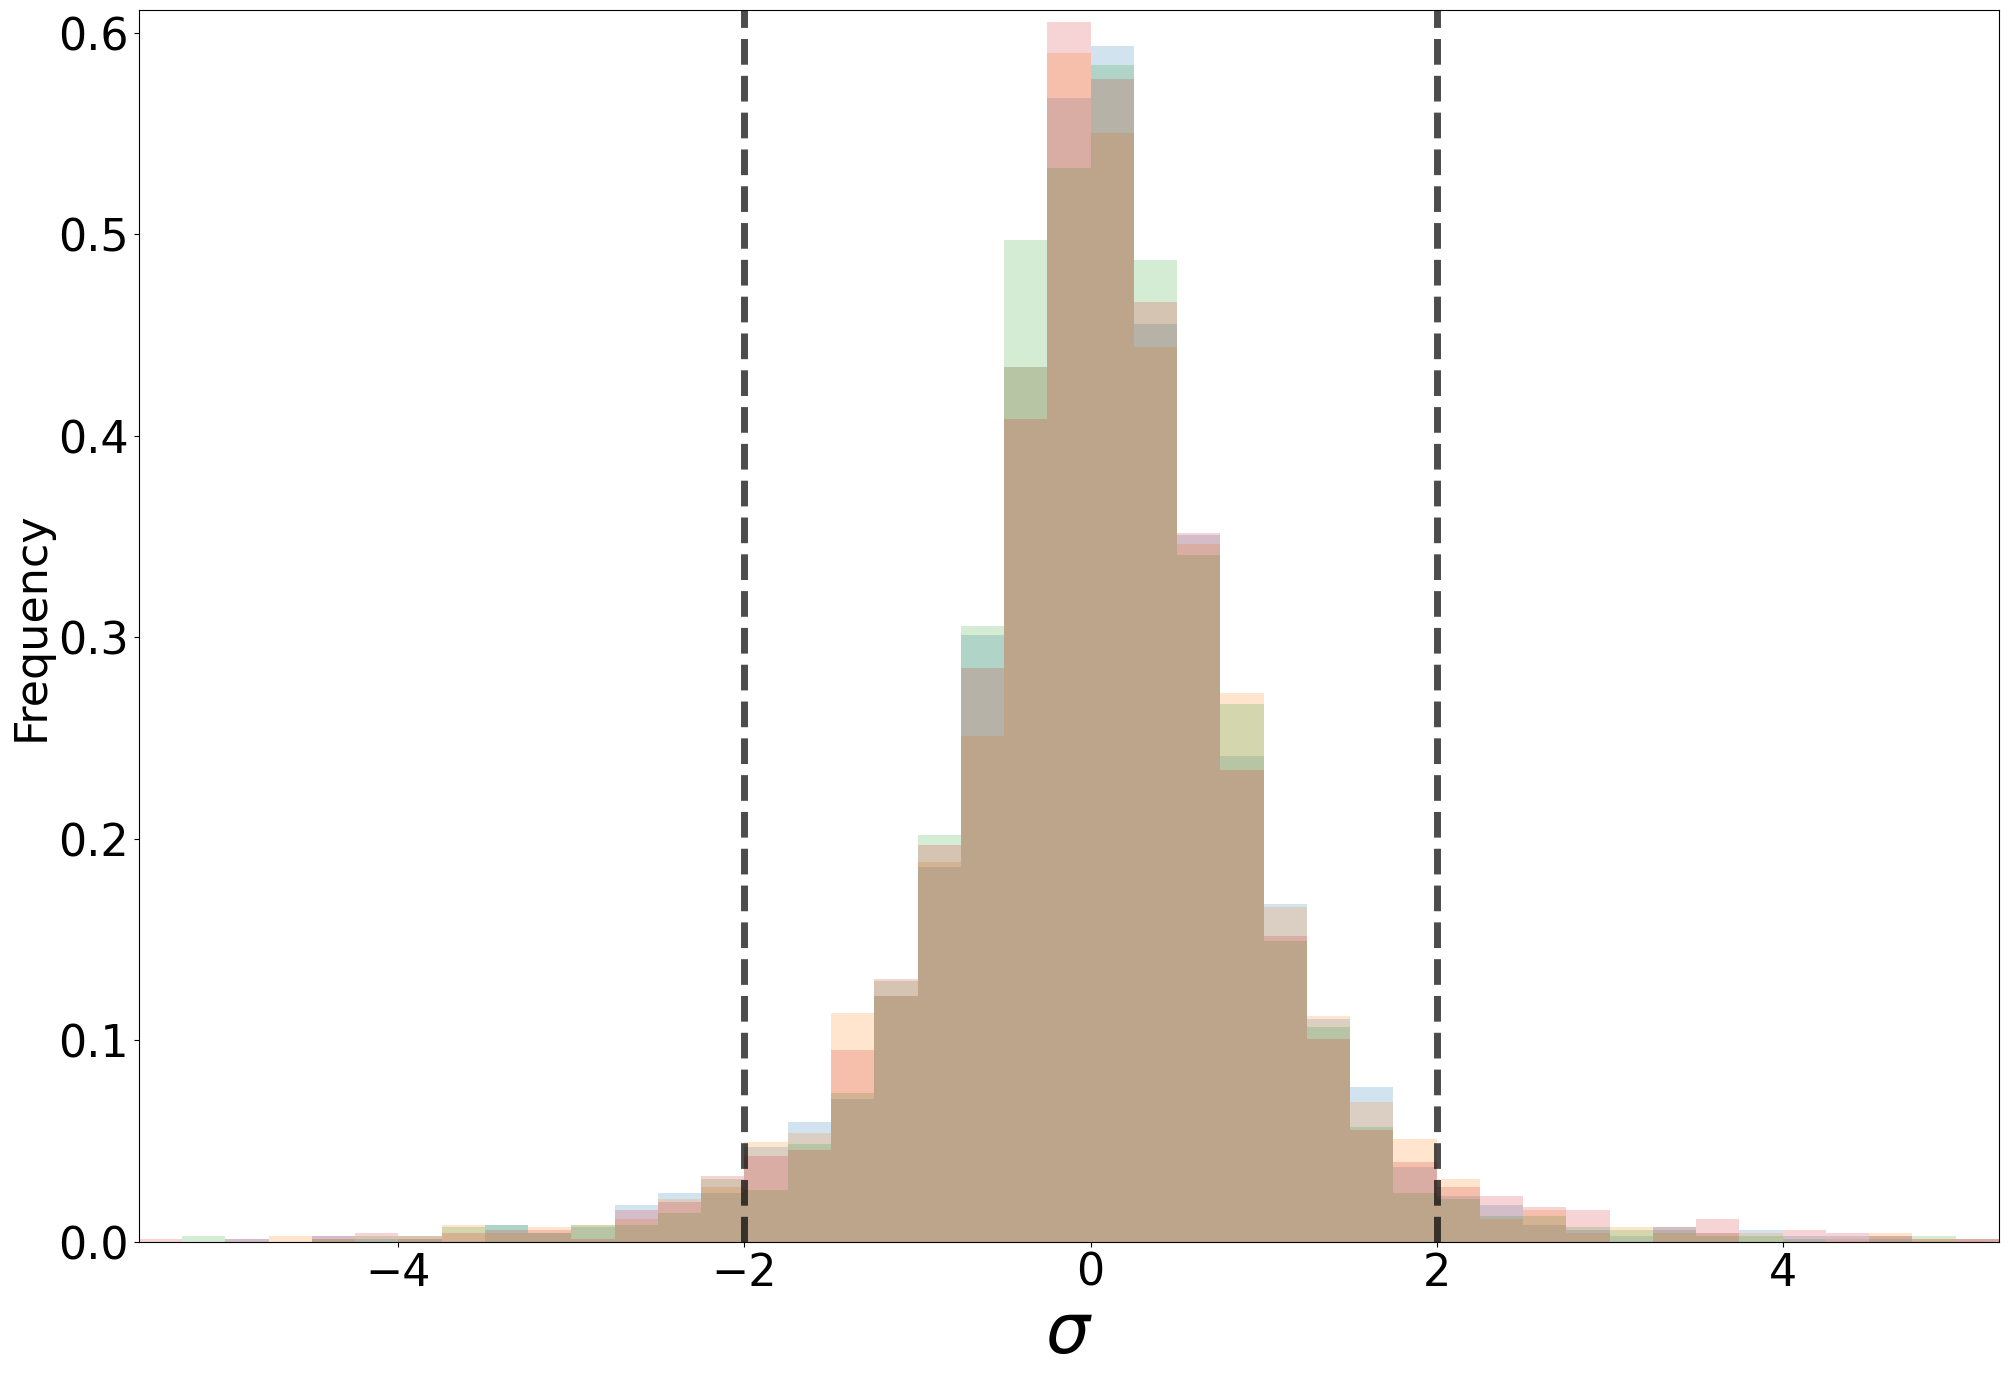

In [31]:
# replot after normalizing data by standard deviation
fig, ax = plt.subplots(figsize = (24, 16))
for key in price_change_data:
    # set bins to be length of 1%
    norm_plot_data[key].hist(bins = [x / 4 for x in range(-22,22,1)],
                               alpha = .2,
                               label = key,
                             # setting density true, shows frequency by units
                             # of SD
                               density = True,
                               ax = ax)
    
ax.set_ylabel("Frequency")
ax.set_xlabel("$\sigma$", fontsize = 50)
# if this is a normal distribution, 95% of the body of the distribution
# should lie between -1.96 and 1.96 SDs from the mean
ax.axvline(-2, linewidth = 5, ls = "--", color = "k", alpha = .7)
ax.axvline(2, linewidth = 5, ls = "--", color = "k", alpha = .7)
ax.grid(False)

### $\beta$ and Volatility

By plotting distributions of specific stocks, we have casually shown that TSLA is relatively volatile compared to PG, MSFT, and AAPL. Yet, how would we compare this volatility to the *average* volatility in the market? In finance, the relative volatility of a stock is referred to as it's $\beta$ (_beta_). $\beta$ is unique for each security in a portfolio. It is a weight that describes the sensitivity of that security to market changes. $\beta$ is generally found using past market data, where average market performance is indicated by the S&P500.A $\beta$ for a given security, $i$, can be found by taking the ratio of the covariance between the returns from that security and the market returns, and the variance of the market returns. This will quantify relative volatility of a security: 
<h3 align="center">
    <font size="5">
        $ \beta_i = \frac{Cov(r_i,r_m)}{Var(r_m)}$
    </font>
</h3>

Let's add the S&P500 to our list of stocks and compare the distribution of changes in each stock to the S&P500. We will save the list of stocks before adding the S&P500 to aid the next part of this exercise.

In [32]:
price_change_data["S&P 500"] = web.get_data_yahoo("^GSPC",
                                                 start = start,
                                                 end = end)["Close"]

[*********************100%***********************]  1 of 1 completed


In [33]:
price_change_data["S&P 500"] = np.log(price_change_data["S&P 500"]).diff()
price_change_data

,MSFT,AAPL,PG,TSLA,S&P 500
Date,,,,,
2012-01-03,NaN,NaN,NaN,NaN,NaN
2012-01-04,2.326112,0.535969,-0.044898,-1.326441,0.000188
2012-01-05,1.016714,1.104083,-0.420052,-2.152171,0.002939
2012-01-06,1.541526,1.039955,-0.240813,-0.777346,-0.002540
2012-01-09,-1.325000,-0.158744,0.421051,1.255570,0.002259
...,...,...,...,...,...
2023-03-21,0.567752,1.187335,-0.726121,7.529223,0.012899
2023-03-22,-0.545715,-0.914514,-0.062482,-3.308515,-0.016600
2023-03-23,1.952965,0.694529,-0.139004,0.558213,0.002980


In [34]:
def calculate_beta(data, stock_key, market_key):
    df = data[[stock_key, market_key]].dropna()
    stock_cov = covariance(df[stock_key], df[market_key], sample = True)
    market_v
    ar = variance(df[market_day], sample = True)
    beta = stock_cov / market_var
    
    return beta
    
betas = {}
for stock in stocks:
    betas[stock] = calculate_beta(price_change_data, stock, "S&P 500")
pd.DataFrame(betas, index = ["$\\beta$"]).T

NameError: name 'market_v' is not defined

KeyError: 'MSFT'

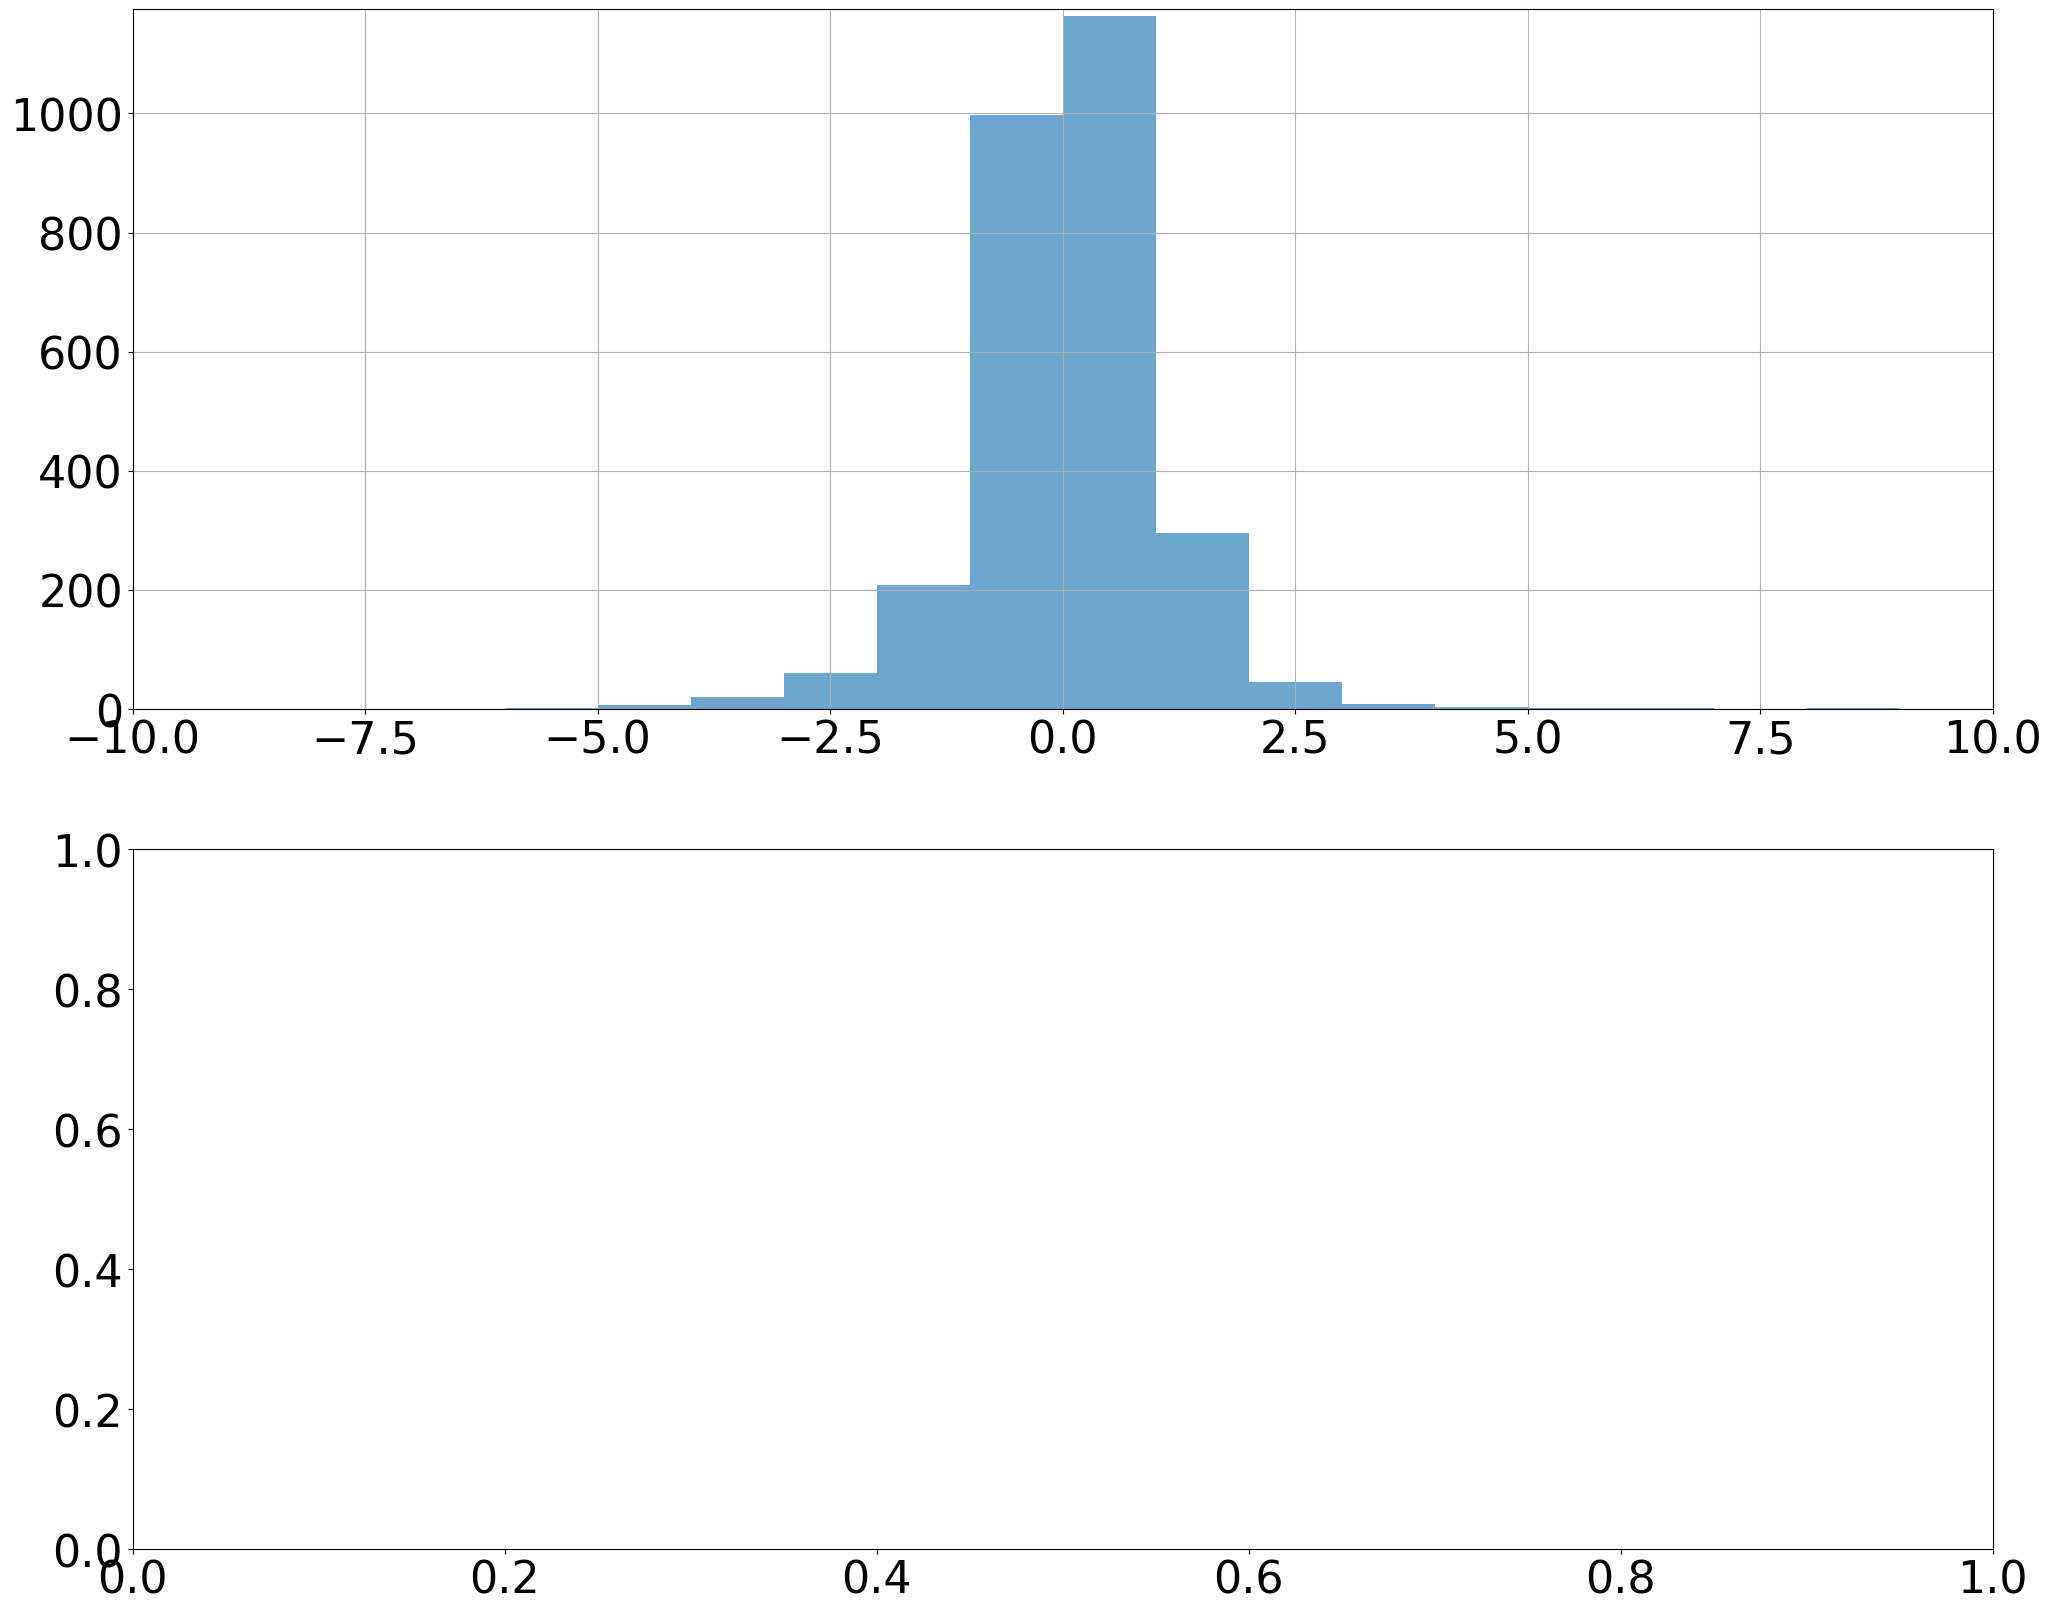

In [35]:
plot_data = price_change_data.mul(100)
for stock in stocks:
    fig, ax = plt.subplots(2,1,figsize = (24,20))
    ## plot the distribution of data for S&P alongside each stock
    plot_data["S&P 500"].hist(
        bins = [x for x in range(-10,11,1)],
        label = "S&P Daily Returns; $\\beta$ = "+ str(1),
        ax = ax[0],
        density = False,
        alpha = .65)
    
    plot_data[stock].hist(
        bins = [x for x in range(-10,11,1)],
        label = stock + " Daily Returns; $\\beta$ = " + str(betas[stock].round(2)),
        ax = ax[0],
        density = False,
        alpha = .65)
    
    ax[0].legend(bbox_to_anchor = (.45, 1.3))
    ax[0].set_ylabel("# of Days")
    ax[0].set_xlabel("Price Change")
    ax[0].set_xticklabels([str(x) + "%" for x in ax[0].get_xticks()])
    ax[0].grid(False)
    
    ## plot a ts scatter of data for S&P alongside each stock
    
    plot_data[stock].plot(linestyle = "",
                                     marker = "o",
                                     alpha = .65,
                                     markersize = 4,
                                     color = "C0",
                                     ax = ax[1])
    
    plot_data["S&P 500"].plot(linestyle = "",
                                     marker = "o",
                                     alpha = .5,
                                     markersize = 4,
                                     color = "C0",
                                     ax = ax[1])
    ax[1].set_ylabel("Price Change")
    

In [41]:
n = 100
m = 1000

dist_avgs = {"Die Rolls" : [],
            "Poisson":[],
            "Lognormal":[]}
# this has created a sample of m means from distributions of length n
for i in range(m):
    dist_avgs["Die Rolls"].append(mean(np.random.randint(1,7,n)))
    dist_avgs["Poisson"].append(mean(np.random.poisson(1,n)))
    dist_avgs["Lognormal"].append(mean(np.random.lognormal(0,1,n)))
    
# each column is a sample of sample means
dist_avgs = pd.DataFrame(dist_avgs)
dist_avgs

,Die Rolls,Poisson,Lognormal
0,3.58,1.01,1.595472
1,3.52,0.93,1.476272
2,3.42,1.14,1.672529
3,3.36,1.04,1.466839
4,3.31,1.07,1.515381
...,...,...,...
995,3.46,1.10,1.481957
996,3.43,0.78,1.828070
997,3.60,1.00,1.533588
998,3.71,0.90,1.263279


AttributeError: 'numpy.ndarray' object has no attribute 'get_figure'

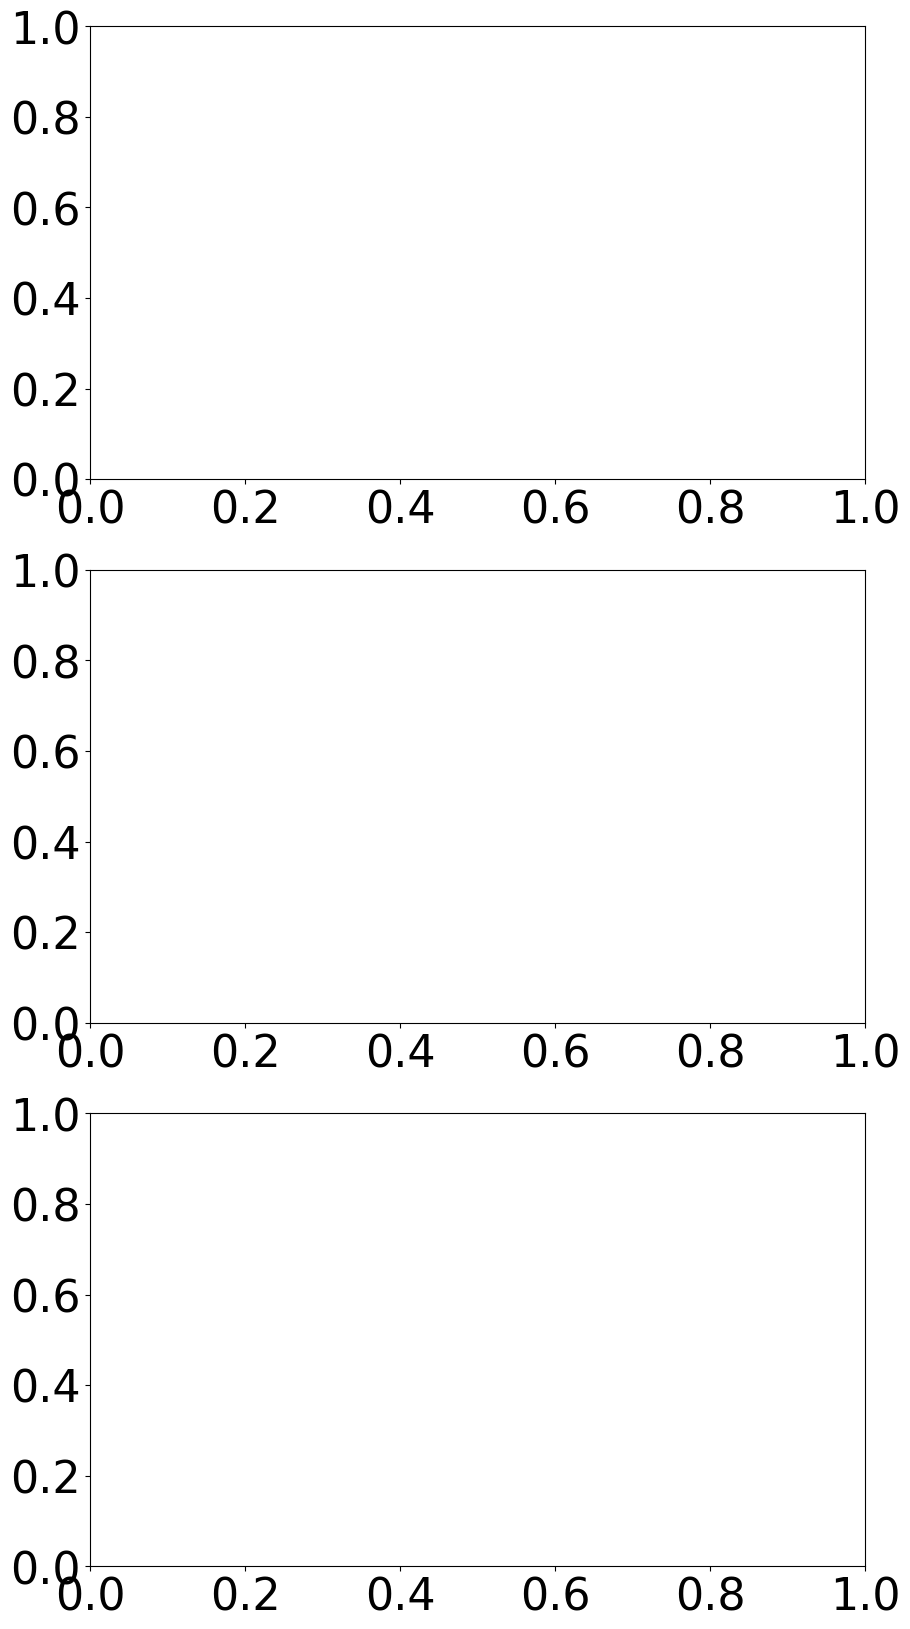

In [42]:
fig, ax = plt.subplots(3, figsize=(10, 20))
dist_avgs.plot.hist(density=True,
                    ax=ax,
                    bins=20,
                    color=["C1", "C2", "C3"],
                    alpha=.5,
                   legend = False)
dist_avgs.plot.kde(ax=ax, color=["C1", "C2", "C3"], legend=False)
ax.set_title("Non-Centered Distributions")

In [38]:
means_df = pd.DataFrame()
sd_df = pd.DataFrame()
for key in dist_avgs:
    ## Center Distributions
    # df that center the distribution at zero by subtracting the 
    # mean value from each sample mean
    means_df[key] = dist_avgs[key].sub(dist_avgs.mean()[key])
    ## Normalize Distributions
    # divide each observation by the distributions standard deviation
    sd_df[key] = mean_df[key] / means_df.std()[key]
sd_df

AttributeError: 'list' object has no attribute 'sub'

AttributeError: 'dict' object has no attribute 'plot'

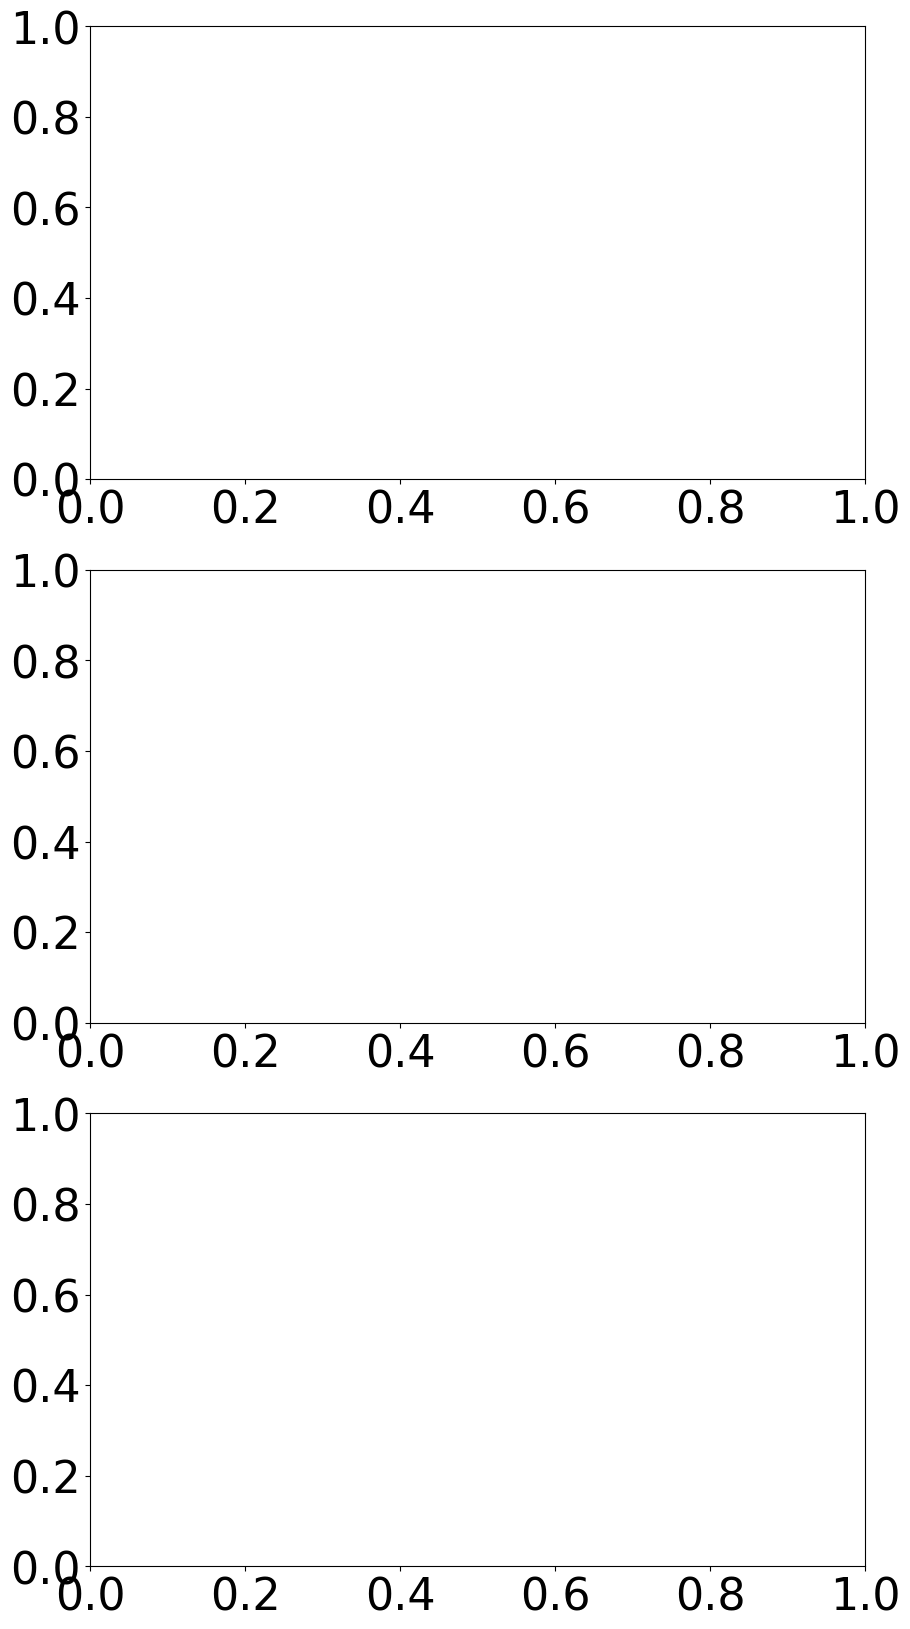

In [39]:
# save dfs in a single dictionary
df_dct = {"Non-Centered Distributions":dist_avgs,
         "Centered Distributions":means_df,
         "Centered Distributions Normalized by SD":sd_df}


# use the keys in the dictionary to call each df 
keys = list(df_dct.keys())
# automatically count number of keys in the dictionary
num_figs = len(keys)
fig, axs = plt.subplots(num_figs, figsize=(10, 20))

# cycle through each index value in the list of keys
for i in range(num_figs):
    # define the key by the index value
    key = keys[i]
    #select the ax by the index value
    ax = axs[i]
    # select dataframe that is linked to key
    plot_df = df_dct[key]
    # count the number of columns in the data frame
    # this is number of distributions
    num_samples = len(plot_df.keys())
    # each distribution will be assigned its own color
    colors = ["C" + str(c) for c in range (num_samples)]

    # first, plot the dataframe containing the distributions of the random sample means 
    plot_df.plot.hist(density=True,
                        ax=ax,
                        bins=20,
                        color=colors,
                        alpha=.5,
                       legend = False)
    # fit a distribution curve on the relevant data
    plot_df.plot.kde(ax=ax, color=colors, legend=False)
    ax.set_title(key)


## Simulation

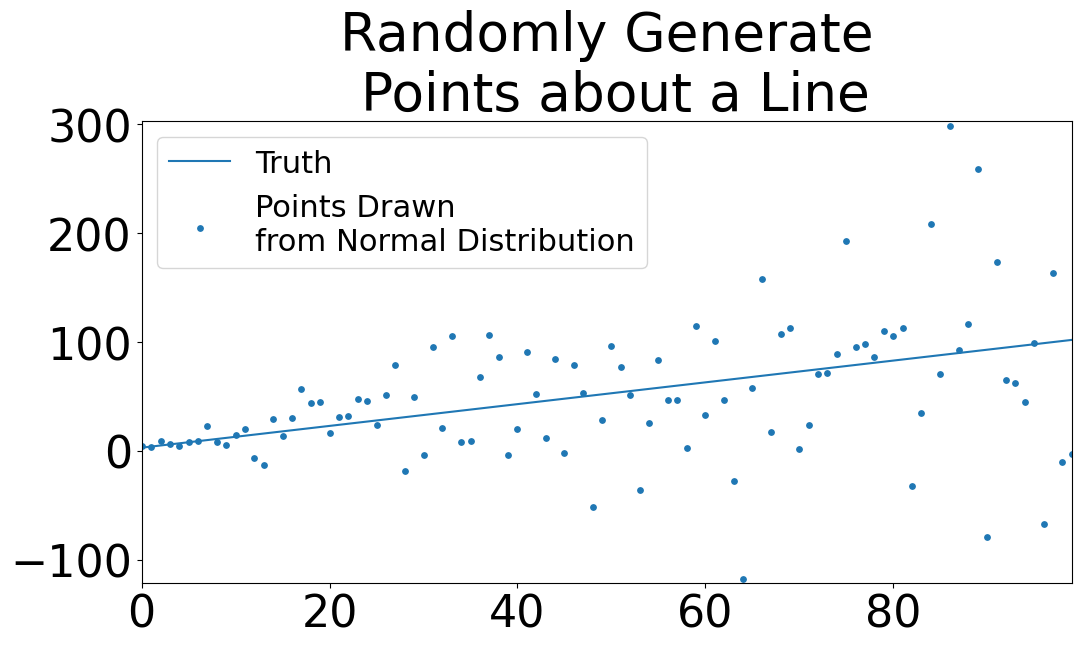

In [56]:
import random
points = []
# generate random points using the values from line 
# as mean and standard deviation
line = np.array([i + 3 for i in range (100)])
for point in line:
    # random.normalvariate(mu=mean, sigma=SD)
    points.append(random.normalvariate(mu = point,
                                       sigma =point))
figure = plt.figure(figsize = (12,6))
plt.plot(line, label = "Truth")
plt.scatter(np.arange(len(points)),
            points, 
            label = "Points Drawn\nfrom Normal Distribution",
            s = 15)
plt.title("Randomly Generate\n Points about a Line")
plt.legend(loc = "best", fontsize = 22)
plt.show()

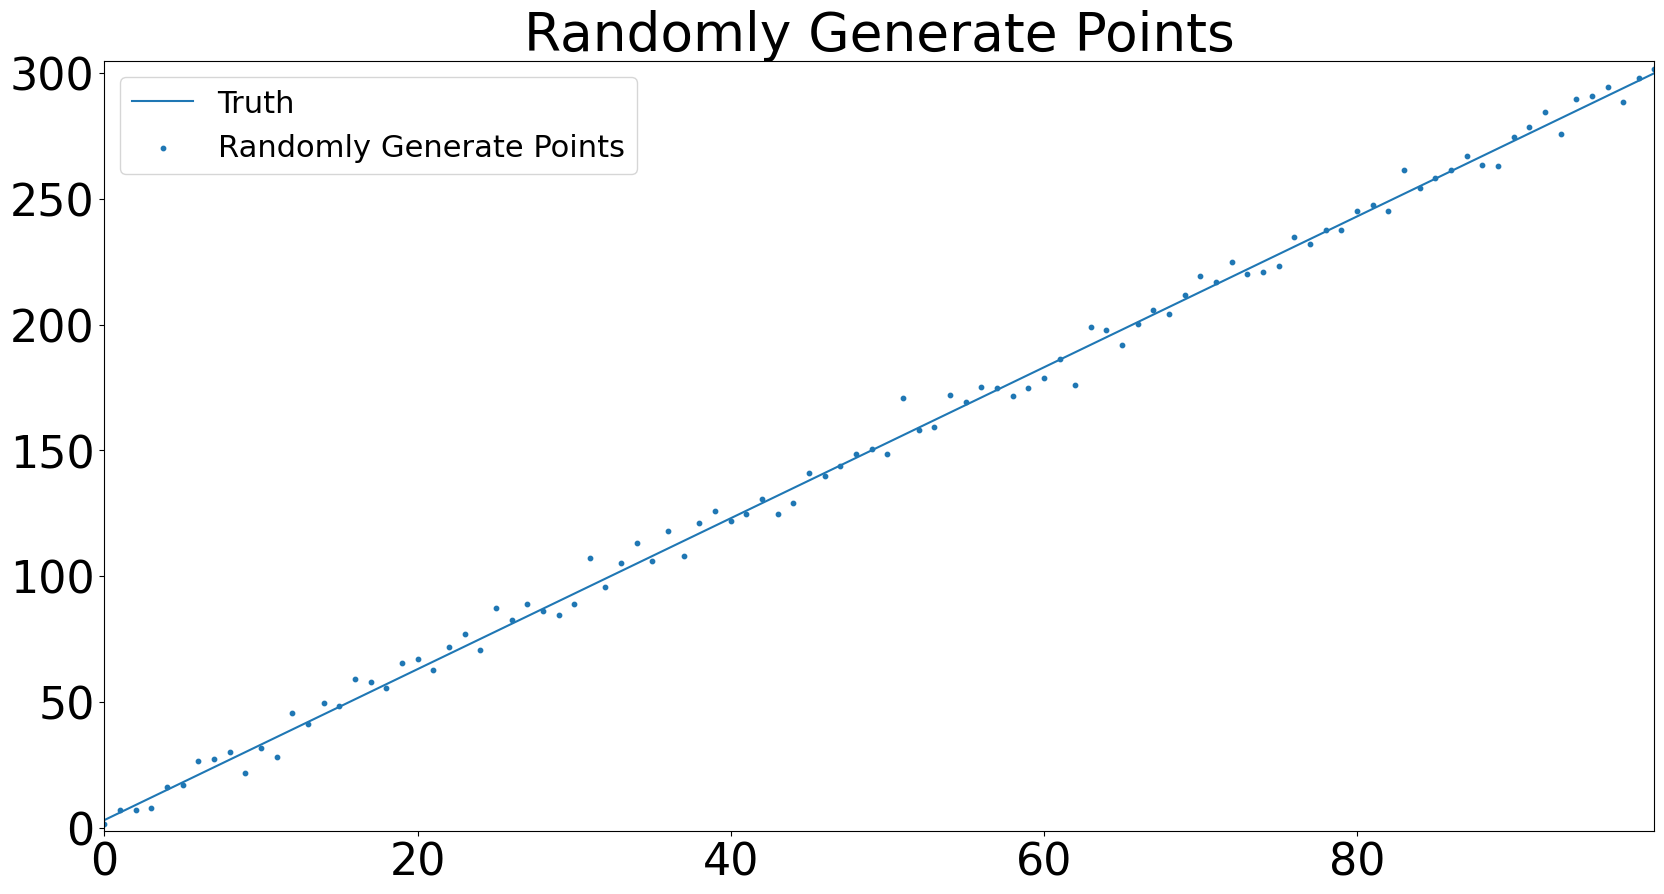

In [66]:
def build_random_data_with_line(y_int, slope, SD = 1):
    line = np.array([slope * (i) + y_int for i in range(100)])
    points = []
    for point in line:
        points.append(random.normalvariate(point,SD))
    return line, points
def plot_line(line, points, line_name = "Truth", 
             title = "Randomly Generate Points"):
    figure = plt.figure(figsize = (20,10))
    plt.plot(line, label = line_name)
    plt.scatter(np.arange(len(points)), points, s = 10,
               label = title)
    plt.title(title)
    plt.legend(loc = "best", fontsize = 22)
    plt.show()
line, points = build_random_data_with_line(y_int = 3, slope = 3, SD = 5)
plot_line(line,points)


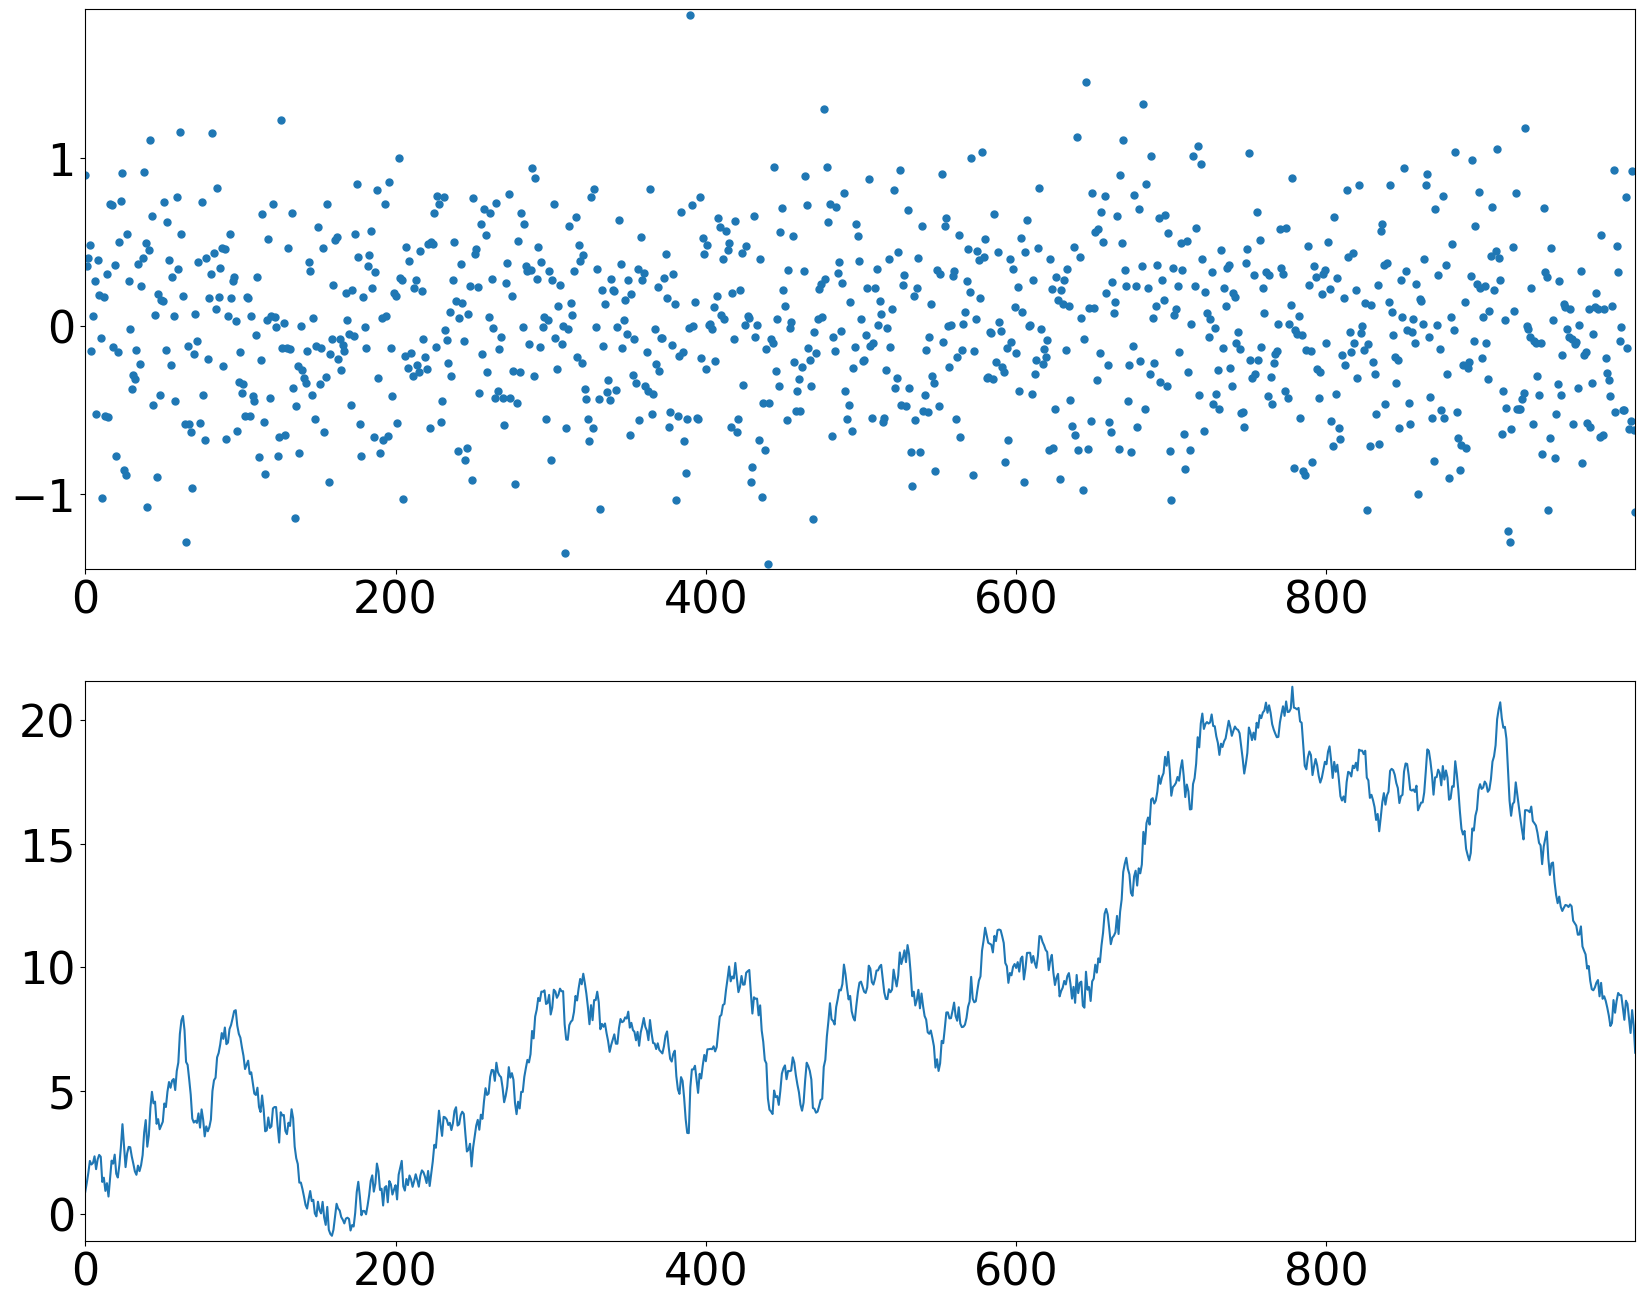

In [71]:
# single simulation

random_list = [random.normalvariate(0, .5) for i in range (1000)]
fig, axs = plt.subplots(2, figsize = (20,16))
axs[0].plot(random_list,ls = "", marker = ".", markersize = 10)

simulation = []
for i in range(len(random_list)):
    val = random_list[i]
    if i == 0:
        simulation.append(val)
    else:
        # add last value observed in simulaiton + change (which is val)
        # this will generate the latest value in the simulation
        simulation.append(simulation[-1] + val)
axs[1].plot(simulation)
plt.show()
plt.close()
